In [5]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import odeint 
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [6]:
def model(v,t):
    x1,x2,x3=v
    dx1dt=-(1/2)*x1
    dx2dt=(1/2)*x1-(1/4)*x2
    dx3dt=(1/4)*x2-(1/6)*x3
    return np.array([dx1dt, dx2dt,dx3dt])
vo=[1,1,1]
t=np.linspace(0,4,200)
v=odeint(model,vo,t)
x1=v[:,0]
x2=v[:,1]
x3=v[:,2]
print("x1=",x1,"\nx2=",x2,"\nx3=",x3)

x1= [1.         0.99000007 0.98010016 0.97029926 0.96059635 0.95099047
 0.94148064 0.93206592 0.92274534 0.91351796 0.90438286 0.8953391
 0.88638578 0.877522   0.86874685 0.86005946 0.85145894 0.84294442
 0.83451504 0.82616996 0.81790833 0.80972932 0.80163209 0.79361583
 0.78567974 0.777823   0.77004483 0.76234445 0.75472106 0.74717391
 0.73970224 0.73230528 0.72498229 0.71773254 0.71055528 0.70344979
 0.69641535 0.68945126 0.6825568  0.67573129 0.66897403 0.66228435
 0.65566156 0.649105   0.642614   0.63618792 0.62982609 0.62352788
 0.61729266 0.61111978 0.60500864 0.5989586  0.59296907 0.58703942
 0.58116908 0.57535744 0.56960391 0.56390792 0.55826889 0.55268625
 0.54715943 0.54168788 0.53627105 0.53090838 0.52559934 0.52034339
 0.51514    0.50998865 0.5048888  0.49983996 0.4948416  0.48989323
 0.48499434 0.48014443 0.47534303 0.47058964 0.46588378 0.46122498
 0.45661277 0.45204668 0.44752626 0.44305103 0.43862056 0.4342344
 0.42989209 0.42559321 0.42133731 0.41712398 0.41295278 0.40

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


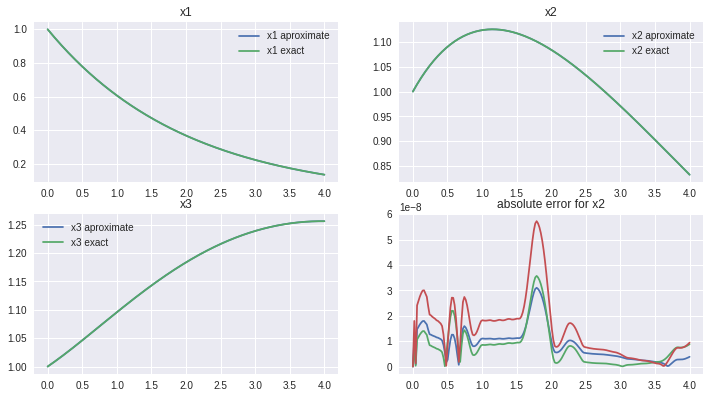

In [7]:
x11=np.exp(-t/2)
x22=-2*np.exp(-t/2)+3*np.exp(-t/4)
x33=(3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)

plt.style.use("seaborn")

plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
plt.plot(t,x1,label="x1 aproximate")
plt.plot(t,x11,label="x1 exact")
plt.title("x1")
plt.legend()




plt.subplot(3,2,2)
plt.plot(t,x2,label="x2 aproximate")
plt.plot(t,x22,label="x2 exact")
plt.title("x2")
plt.legend()


plt.subplot(3,2,3)
plt.plot(t,x3,label="x3 aproximate")
plt.plot(t,x33,label="x3 exact")
plt.title("x3")
plt.legend()

plt.subplot(3,2,4)
plt.plot(t,abs(x1-x11))
plt.title("absolute error for x1")

#plt.subplot(3,2,6)
plt.plot(t,abs(x3-x33))
plt.title("absolute error for x3")

#plt.subplot(3,2,4)
plt.plot(t,abs(x2-x22))
plt.title("absolute error for x2")

plt.show()

$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem =\eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [8]:
def  EulerOdeSys(f,c,t):
    N=len(t)
    M=len(f(v,t))
    H=t[1]-t[0]
    Z=np.zeros((N,M))
    Z[0]=c
    for k in range(N-1):
        Z[k+1]=Z[k]+H*f(Z[k],t[k])
    return Z  

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [9]:
def RK4OdeSys(f,c,t):
    N=len(t)
    M=len(f(v,t))
    H=t[1]-t[0]
    Z=np.empty((N,M))
    Z[0]=c
    for k in range(N-1):
        k1=f(Z[k],t[k])
        k2=f(Z[k]+H*(k1/2),t[k]+(H/2))
        k3=f(Z[k]+H*(k2/2),t[k]+(H/2))
        k4=f(Z[k]+H*k3,t[k]+H)
        Z[k+1]=Z[k]+(H/6)*(k1+2*k2+2*k3+k4)
    return Z


3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [10]:
def model(v,t):
    x1=v[0]
    x2=v[1]
    x3=v[2]
    #x1,x2,x3=v
    dx1dt=-(1/2)*x1
    dx2dt=(1/2)*x1-(1/4)*x2
    dx3dt=(1/4)*x2-(1/6)*x3
    return np.array([dx1dt, dx2dt,dx3dt])
vo=[1,1,1]
t=np.linspace(0,4,200)

# f=model(vo,t)
c=vo

z2=RK4OdeSys(model,c,t)

print("xi1=",z2[:,0],"\n\nxi2=",z2[:,1],"\n\nxi3=",z2[:,2])

xi1= [1.         0.99000008 0.98010017 0.97029925 0.96059634 0.95099045
 0.94148063 0.9320659  0.92274532 0.91351794 0.90438284 0.89533909
 0.88638577 0.87752199 0.86874684 0.86005945 0.85145892 0.84294441
 0.83451503 0.82616995 0.81790832 0.80972931 0.80163208 0.79361583
 0.78567974 0.777823   0.77004484 0.76234446 0.75472107 0.74717393
 0.73970225 0.73230529 0.7249823  0.71773254 0.71055527 0.70344978
 0.69641534 0.68945124 0.68255679 0.67573128 0.66897402 0.66228434
 0.65566155 0.64910499 0.64261399 0.63618791 0.62982608 0.62352787
 0.61729265 0.61111977 0.60500863 0.59895859 0.59296905 0.58703941
 0.58116907 0.57535743 0.5696039  0.56390791 0.55826888 0.55268624
 0.54715942 0.54168787 0.53627104 0.53090837 0.52559933 0.52034338
 0.51513999 0.50998864 0.50488879 0.49983995 0.49484159 0.48989322
 0.48499432 0.48014442 0.47534302 0.47058963 0.46588377 0.46122497
 0.45661276 0.45204667 0.44752624 0.44305102 0.43862054 0.43423438
 0.42989207 0.42559318 0.42133729 0.41712395 0.41295275 0

In [11]:
z=EulerOdeSys(model,c,t)
print("x1=",z[:,0],"\n\nx2=",z[:,1],"\n\nx3=",z[:,2])

x1= [1.         0.98994975 0.98000051 0.97015125 0.96040099 0.95074872
 0.94119346 0.93173422 0.92237006 0.91310001 0.90392313 0.89483847
 0.88584512 0.87694215 0.86812866 0.85940375 0.85076653 0.84221611
 0.83375163 0.82537222 0.81707702 0.80886519 0.80073589 0.79268829
 0.78472158 0.77683493 0.76902754 0.76129862 0.75364738 0.74607303
 0.73857481 0.73115195 0.72380369 0.71652928 0.70932798 0.70219906
 0.69514178 0.68815543 0.68123929 0.67439267 0.66761485 0.66090516
 0.65426289 0.64768739 0.64117797 0.63473397 0.62835473 0.62203961
 0.61578795 0.60959913 0.6034725  0.59740745 0.59140336 0.58545961
 0.57957559 0.57375071 0.56798437 0.56227599 0.55662497 0.55103075
 0.54549275 0.54001041 0.53458317 0.52921048 0.52389178 0.51862654
 0.51341421 0.50825427 0.50314618 0.49808944 0.49308351 0.4881279
 0.48322209 0.47836559 0.4735579  0.46879852 0.46408698 0.45942279
 0.45480547 0.45023456 0.44570959 0.4412301  0.43679562 0.43240572
 0.42805993 0.42375782 0.41949895 0.41528288 0.41110918 0.4

4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

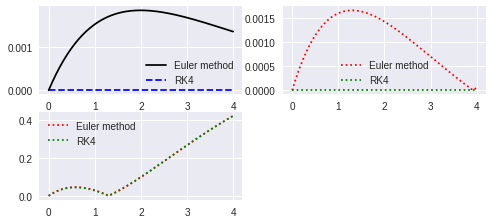

In [12]:
# absolute error from euler
er_1=abs(z[:,0]-x11)
er_2=abs(z[:,1]-x22)
er_3=abs(z[:,1]-x33)


er_R1=abs(z2[:,0]-x11)
er_R2=abs(z2[:,1]-x22)
er_R3=abs(z2[:,1]-x33)

plt.subplot(3,2,1)
plt.plot(t,er_1,'k',label="Euler method")
plt.plot(t,er_R1,'b--',label="RK4")
plt.legend()

plt.subplot(3,2,2)

plt.plot(t,er_2,'r:',label="Euler method")
plt.plot(t,er_R2,"g:",label="RK4")
plt.legend()

plt.subplot(3,2,3)

plt.plot(t,er_3,'r:',label="Euler method")
plt.plot(t,er_R3,"g:",label="RK4")
plt.legend()
plt.show()

From the plot above we can only conclude that the more accurate function is either <b>odeint</b> and <b>RK4</b> since they give a solution with the lowest error. To identify the more accurate solver, let us plot the absolute error between the exact and approximate solutions (obtained with <b>odeint</b> and <b>RK4</b>), tell us which function gives a more accurate solution of a system of ODEs.

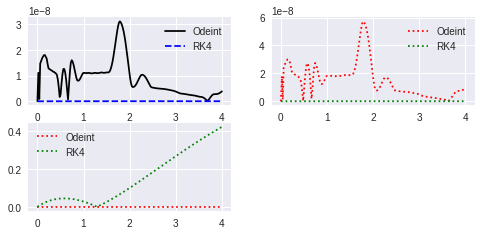

In [13]:
#Absolute error between odeint and Runge kutta
er_od1=abs(v[:,0]-x11)
er_od2=abs(v[:,1]-x22)
er_od3=abs(v[:,2]-x33)

plt.subplot(3,2,1)
plt.plot(t,er_od1,'k',label="Odeint")
plt.plot(t,er_R1,'b--',label="RK4")
plt.legend()

plt.subplot(3,2,2)

plt.plot(t,er_od2,'r:',label="Odeint")
plt.plot(t,er_R2,"g:",label="RK4")
plt.legend()

plt.subplot(3,2,3)

plt.plot(t,er_od3,'r:',label="Odeint")
plt.plot(t,er_R3,"g:",label="RK4")
plt.legend()
plt.show()


$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [11]:
# Backaward Euler scheme
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt
def MatGenerator(a,b,K,alpha,beta,N,g):
    h=(b-a)/N
    global x
    x=np.linspace(a,b,N+1)
    b=np.zeros(N+1)
    b[0]=alpha
    b[N]=beta
    b[1:N]=(h**2/K)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-1
    A[N-1,N]=-1
    A[1:N,1:N]=2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)-np.eye(N-1,N-1,k=-1)
    return A,b

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x $$

[-4.         -3.99979785 -3.99918765 -3.9981612  -3.99671021 -3.99482623
 -3.99250073 -3.989725   -3.98649024 -3.9827875  -3.97860771 -3.97394163
 -3.96877993 -3.96311311 -3.95693154 -3.95022545 -3.94298491 -3.93519986
 -3.92686009 -3.91795523 -3.90847477 -3.89840804 -3.88774421 -3.87647229
 -3.86458114 -3.85205945 -3.83889574 -3.82507839 -3.81059557 -3.79543531
 -3.77958546 -3.76303367 -3.74576746 -3.72777412 -3.70904078 -3.68955439
 -3.66930171 -3.64826929 -3.62644352 -3.60381056 -3.58035641 -3.55606683
 -3.5309274  -3.50492351 -3.4780403  -3.45026273 -3.42157554 -3.39196325
 -3.36141016 -3.32990036 -3.2974177  -3.26394581 -3.22946808 -3.19396767
 -3.15742752 -3.11983031 -3.08115849 -3.04139424 -3.00051952 -2.95851603
 -2.9153652  -2.87104821 -2.82554598 -2.77883917 -2.73090816 -2.68173306
 -2.6312937  -2.57956963 -2.52654014 -2.4721842  -2.41648051 -2.35940747
 -2.30094317 -2.24106543 -2.17975173 -2.11697926 -2.05272489 -1.98696517
 -1.91967634 -1.8508343  -1.78041463 -1.70839257 -1

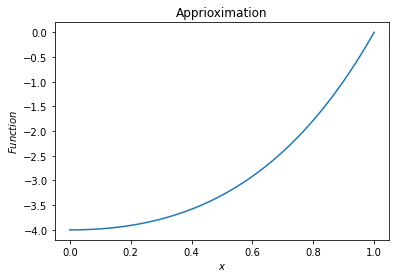

(101,)


In [38]:
a=0
b=1
K=1
alpha=-4
beta=0
N=100
x=np.linspace(a,b,N+1)
#x=np.linspace(a,b,N+1)
g=lambda x: -4*(1+x)*np.exp(x)
x_exact=g(x)
A,b=MatGenerator(a,b,K,alpha,beta,N,g)
u=np.linalg.solve(A,b)
print(u)
plt.plot(x,u)
#plt.grid()
plt.xlabel("$x$")
plt.ylabel("$Function$")
plt.title("Apprioximation")
plt.show()
print (u.shape)

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

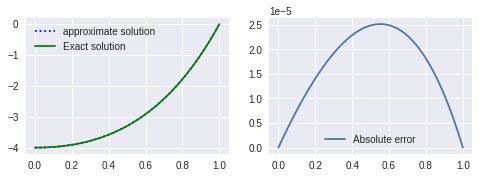

(101,)


In [22]:
ui=lambda x: 4*(x-1)*np.exp(x)
ui_exat=ui(x)
u=np.linalg.solve(A,b)
#plt.figure(figsize)
plt.subplot(2,2,1)
plt.plot(x,u,"b:",label="approximate solution")
plt.plot(x,ui_exat,"g",label="Exact solution")
plt.legend()
plt.subplot(2,2,2)
plt.plot(x,abs(u-ui_exat),label="Absolute error")
plt.legend()
plt.show()
print(x.shape)

4. If the parameter $K(x)$ varies with $x$, then the steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\dfrac{d}{dx}\Bigl( K(x)\dfrac{dU}{dx} \Bigl) = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}


In this case, the backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{1}{H^2}\Bigl(-K(x_{i-1/2})U_{i-1} +(K(x_{i-1/2})+K(x_{i+1/2}))U_i - K(x_{i+1/2})U_{i+1}\Bigr) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta,
  \end{cases}
\end{equation}
where $x_{i+1/2} = x_i+H/2$.
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
a. Write a Python function <b> MatGenerator1 </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [27]:
def MatGenerator1(a,b,k,alpha,beta,N,g):
    h=(b-a)/N
    global x,xi
    x=np.linspace(a,b,N+1)
    #xp=xi+h/2
    b=np.zeros(N+1)
    b[0]=alpha
    b[N]=beta
    b[1:N]=(h**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
   # A[0,0],A[N,N]=1,1
    A[1,0]=-k(x[0]+h/2)
    A[N-1,N]=-k(x[N-1]+h/2)
    #A[1:N,1:N]=np.zeros((N-1,N-1))
    for i in range (1,N-1):
        A[i+1,i]=-k(x[i-1])
        A[i,i]=k(x[i-1]+h/2)+k(x[i]+h/2)
        A[i,i+1]=-k(x[i]+h/2)                                                                           
    return A,b          
   

b. Solve the steady-state heat-conduction problem for 

$$a=-1, b= 1, K(x)=x^2,\alpha = -8, \beta = 0, N= 100 \text{ and } g(x) = -4(x^3+3x^2)e^{x+1} $$

In [40]:
g1=lambda x: -4*(x**3+3*x**2)*np.exp(x+1)
k=lambda x: x**2
a=-1
b=1
alpha=-8
beta=0
N=100
A,b=MatGenerator1(a,b,k,alpha,beta,N,g1)
ans=np.linalg.solve(A,b)
print(ans)
ans.shape


[-8.00000000e+00 -1.26449690e+01 -1.74800923e+01 -2.16894207e+01
 -2.49079767e+01 -2.67808031e+01 -2.69897250e+01 -2.52831954e+01
 -2.15077772e+01 -1.56392925e+01 -7.81113933e+00  1.66322031e+00
  1.22770147e+01  2.33298372e+01  3.39439595e+01  4.31007225e+01
  4.96997481e+01  5.26424953e+01  5.09398466e+01  4.38408600e+01
  3.09765241e+01  1.25082985e+01 -1.07334827e+01 -3.71414002e+01
 -6.42781459e+01 -8.89088808e+01 -1.07151462e+02 -1.14777276e+02
 -1.07690653e+02 -8.26029554e+01 -3.78953034e+01  2.53719185e+01
  1.02398402e+02  1.83703483e+02  2.54578592e+02  2.95333056e+02
  2.82883643e+02  1.94394074e+02  1.37928141e+01 -2.58001148e+02
 -5.88617596e+02 -8.96007375e+02 -1.02944830e+03 -7.58803470e+02
  2.04584622e+02  2.09574238e+03  4.73138910e+03  6.39376387e+03
  2.00580420e-03 -4.54667357e+04 -4.54667379e+05 -1.81866986e+05
 -3.20754171e-02 -3.48153278e-02 -3.95773956e-02 -4.51763928e-02
 -5.13287500e-02 -5.79342251e-02 -6.49523039e-02 -7.23671637e-02
 -8.01748752e-02 -8.83779

(101,)

c. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^{x+1}$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

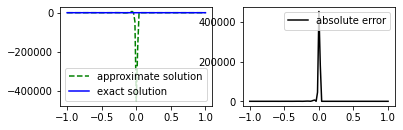

In [42]:
u=lambda x:4*(x-1)*np.exp(x+1)
x_exact=u(x)
plt.subplot(2,2,1)
plt.plot(x,ans,"g--",label="approximate solution")
plt.plot(x,u(x),"b",label="exact solution")
plt.legend()

plt.subplot(2,2,2)
plt.plot(x,abs(ans-u(x)),"k",label="absolute error")
plt.legend()
plt.show()

# Data Visualization
The focus of this module is to provide skills for visualization of different type datasets and to ensure that participants are comfortable with python packages for data visualization. In this module, we will learn about $\href{https://matplotlib.org/}{\text{matplotlib}}$ and $\href{https://seaborn.pydata.org/}{\text{seaborn}}$ which are python packages mostly used for visualising static statistical plots. Other python packages such as $\href{https://plotly.com/}{\text{plotly}}$, $\href{https://bokeh.org/}{\text{Bokeh}}$ and $\href{https://streamlit.io/}{\text{streamlit}}$ are used to visualize dynamic data.

Static data refers to a fixed data or, data that remains the same after it's collected. Dynamic data, on the other hand, continually changes after it's recorded in order to maintain its integrity.

We will first dive into `matplotlib`. `matplotlib` is a visualization library that is built on top of $\href{https://numpy.org/}{\text{NumPy}}$ and is designed to work along with $\href{https://www.scipy.org/}{\text{SciPy}}$. It is mostly used as a standalone package but in recent times, it is also used as wrappers on other packages including `pandas`.

For the first part of the session, we will use simple generated data. This data may act as a `Hello World!` for `matplotlib`. Afterwards, we will dive deeper by using `matplotlib` on DataFrames

## Installing `matplotlib`
One can install `matplotlib` using their python package. There are two python package manager and they are `pip` and `conda`. To install `matplotlib`, open your terminal or command prompt and type the code below. 

For those using `pip` as their python package manager, type; <br>
`pip install matplotlib` 

For those using `conda` as their python package manager, type; <br>
`conda install matplotlib`

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

Let us start by creating a simple example.

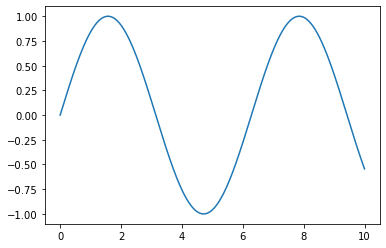

In [14]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 1001)   # generating 100 evenly space numbers between 0 and 10 
y = np.sin(x)
plt.plot(x, y) # calling for the plot function on x and sin(x)

 ## `show()` or No `show()` (How to display your plots)
A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context. 

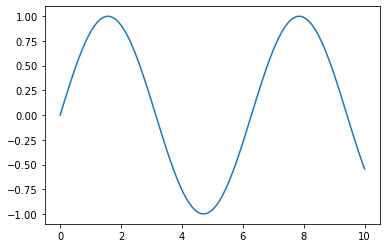

In [15]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x))     # calling for the plot function on x and sin(x)
plt.show()  # calling for the show function

Alternatively, you can use `;` to suppress such unwanted information. In python, `;` is used to suppress output.

In [ ]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 

plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

## Setting Styles
There are many styles in `matplotlib` that one can use. 

In [16]:
plt.style.available?

In [17]:
plt.style.use('seaborn')

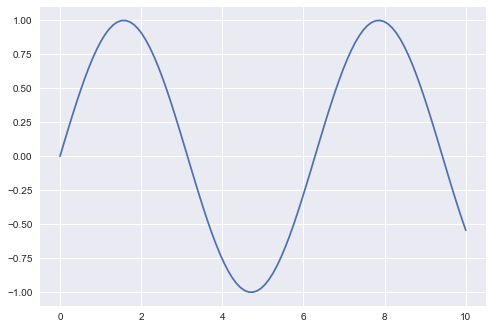

In [18]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

One can create a single figure with multiple lines by calling the `plot` function multiple times

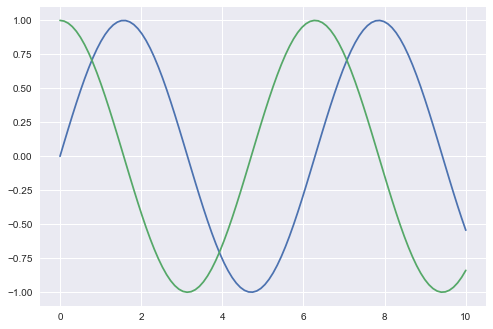

In [19]:
# Plotting multiple lines using matplotlib
plt.plot(x, np.sin(x))   # plotting the first line
plt.plot(x, np.cos(x))  # plotting the second line
plt.show()

## Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig() command. For example, to save the previous figure as a PNG file, you can run this:

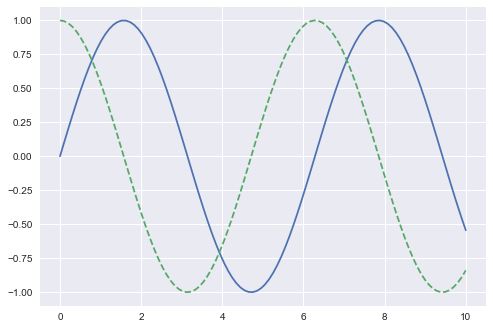

In [21]:
#plt.style.use('classic')
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure2.png')   # calling savefig function to save the plot

## Plotting lines in `matplotlib`

As you can see in the previous plots, `matplotlib` chose the colors and the type of lines automatically. However, one can also set their own colors and line types. Let us look at some examples in the cells below.

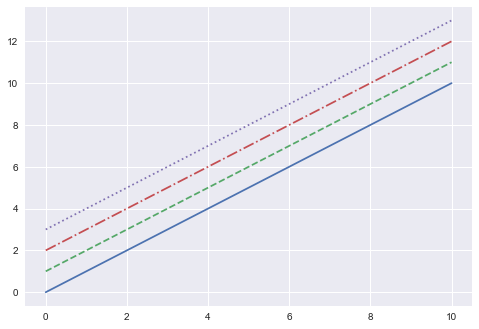

In [22]:
# changing the linestyles
plt.plot(x, x + 0, linestyle='solid')    
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

Alternatively, I can use short cuts to obtain the above plot exactly. 

|character|description|
| ----------- | ----------- |
|```-``` | solid |
|```--``` | dashed |
|```-.``` | dash-dot |
|```:``` | dotted |

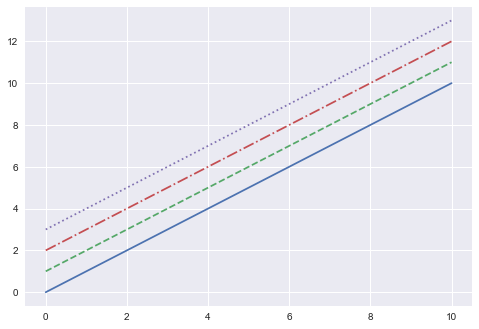

In [23]:
# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted

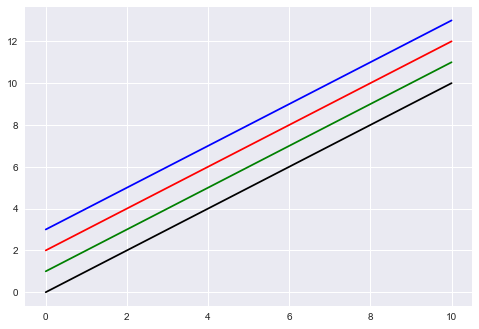

In [24]:
# changing colours of lines
plt.plot(x, x + 0, color='black')  
plt.plot(x, x + 1, color='green') 
plt.plot(x, x + 2, color='red') 
plt.plot(x, x + 3, color='blue')
plt.show()

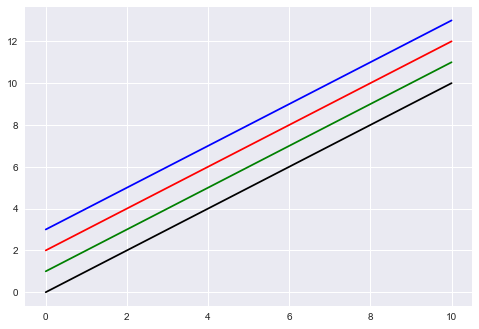

In [25]:
plt.plot(x, x + 0, color='k')  # black line
plt.plot(x, x + 1, color='g')  # green line
plt.plot(x, x + 2, color='r')  # red line 
plt.plot(x, x + 3, color='b'); # blue line

This is the abbreviations for the colours available in `matplotlib`.

| character | color |
| ----------- | ----------- |
| ``'b'`` | blue |
| ``'g'`` | green |
| ``'r'`` | red |
| ``'c'`` | cyan |
| ``'m'`` | magenta |
| ``'y'`` | yellow |
| ``'k'`` | black |
| ``'w'`` | white |

An advantage of using `matplotlib`, is the ability to combine color choice and linestyle. Let us see the example in the cell below.

Next, let us look at some combinations.

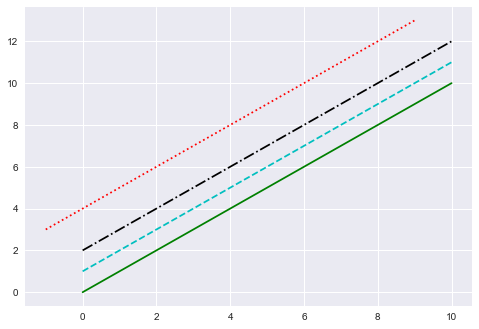

In [26]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x-1, x + 3, ':r'); # dotted red

In [ ]:
plt.plot(x, x+0, '-g', x, x+1, '--c', x, x+2, '-.k', x, x+3, ':r');

Also, one can choose the type of marker they want. For example, in the cell below, we have `go--`. This will generate a green circle marker with dashed lines running in it.

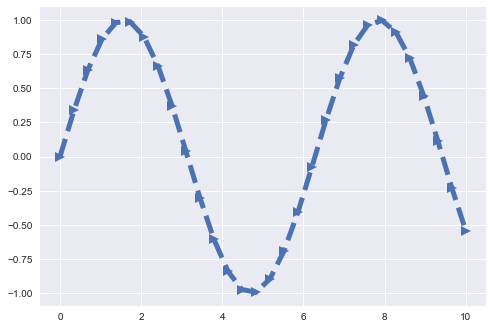

In [32]:
y = np.linspace(0, 10, 30)
plt.plot(y, np.sin(y), '>--', linewidth=5, markersize=10);

**Markers**

|character|description|
| ----------- | ----------- |
|```.``` | point marker|
|```,``` | pixel marker|
|```o``` | circle marker|
|```v``` | triangle_down marker|
|```^``` | triangle_up marker|
|```<``` | triangle_left marker|
|```>``` | triangle_right marker|
|```1``` | tri_down marker|
|```2``` | tri_up marker|
|```3``` | tri_left marker|
|```4``` | tri_right marker|
|```s``` | square marker|
|```p``` | pentagon marker|
|```*``` | star marker|
|```h``` | hexagon1 marker|
|```H``` | hexagon2 marker|
|```+``` | plus marker|
|```x``` | x marker|
|```D``` | diamond marker|
|```d``` | thin_diamond marker|
|```_``` | hline marker|

The general approach to the `plot` function is very simple;

```plot(x, y, [fmt], **kwargs)``` <br>
```plot(x, y, [fmt], x2, y2, [fmt], ..., **kwargs)```

## Adjusting the axes limits
The axes are adjusted by using `xlim` and `ylim` functions.

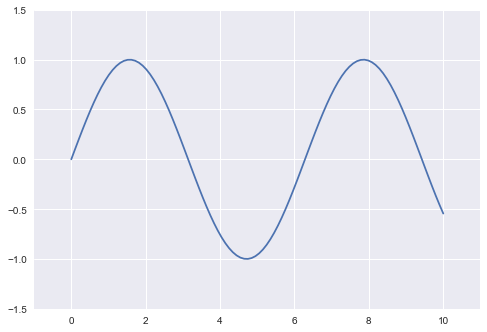

In [33]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis

Alternatively, one can use the `axis` function. `axis()` method allows you to set the `x` and `y` limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`:

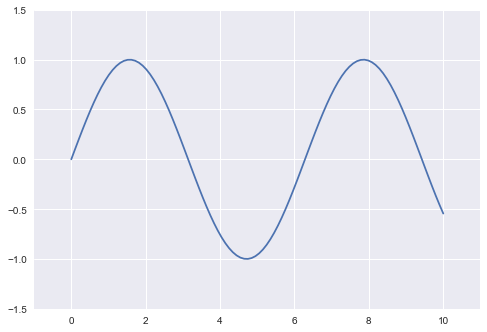

In [34]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes

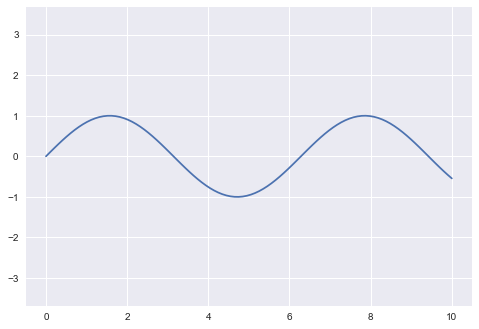

In [35]:
plt.plot(x, np.sin(x))
plt.axis('equal');  # equal option creates a 1:1 aspect ratio

## Labeling plots

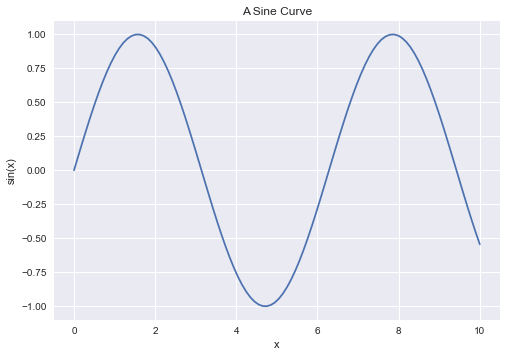

In [39]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 
plt.title?

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the `legend()` method. Though there are several valid ways of using this, it easier to specify the label of each line using the `label` keyword of the plot function:

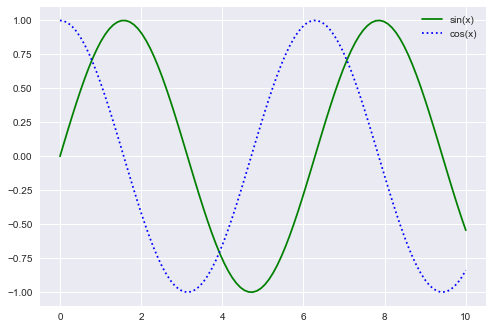

In [40]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend

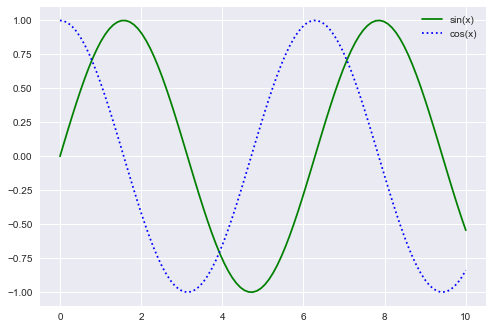

In [41]:
plt.plot(x, np.sin(x), '-g')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b')   # adding the label argument for plot 2
plt.legend(['sin(x)','cos(x)']); # calling for the legend

## Scatter Plot

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape. 

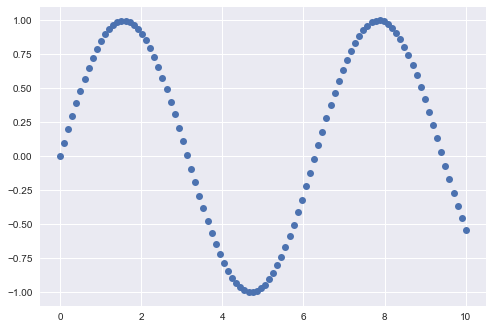

In [46]:
# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x), 'o');

Mainly, and a more powerful method of creating scatter plots is the `scatter` function, which can be used very similarly to the `plot` function:

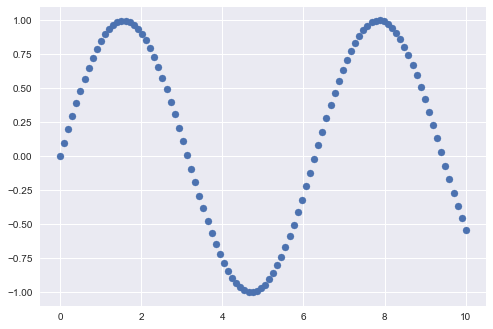

In [47]:
# plotting scatter plot
plt.scatter(x, np.sin(x));
plt.scatter?

### `plot` Versus `scatter`: A Note on Efficiency
Aside from the different features available in `plot` and `scatter`, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plot` can be noticeably more efficient than `scatter`. The reason is that `scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In `plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, `plot` should be preferred over `scatter` for large datasets.

## Plotting Histogram

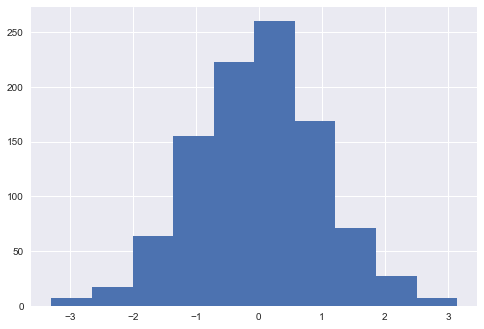

In [48]:
data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

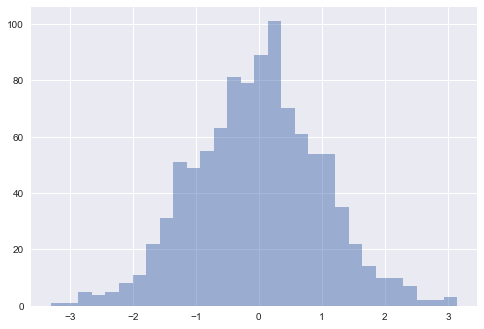

In [49]:
# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

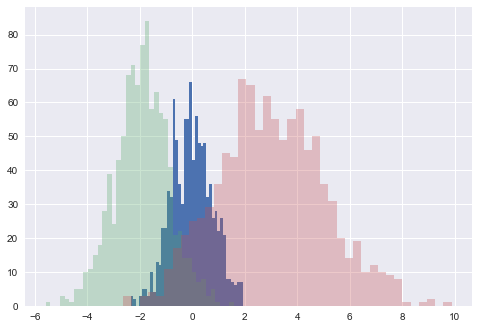

In [56]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=1, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

An alternative to the cell above

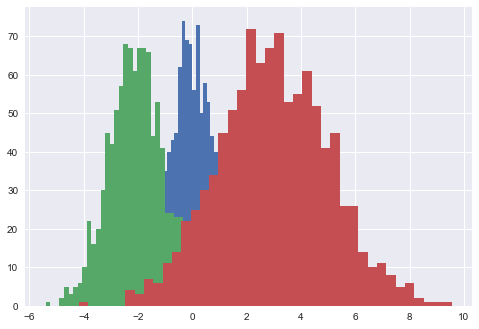

In [59]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict( bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
np.random.randn?
plt.hist?

## Customizing plot legends
Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `legend()` command, which automatically creates a legend for any labeled plot elements:

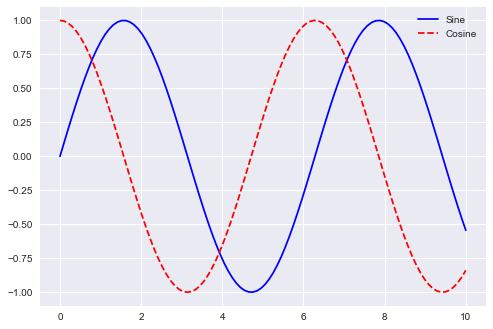

In [53]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend();

But there are many ways we might want to customize such a legend. For example, we can specify the location and turn off the frame:

In [ ]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='upper right'); # adding positional argument to legend

We can use the `ncol` command to specify the number of columns in the legend and `title` to specify the title of the legend:

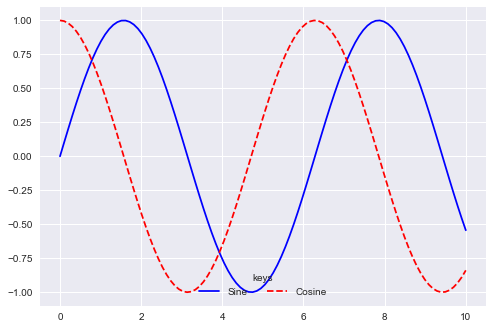

In [54]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='lower center', ncol=2, title='keys');

## Creating Subplots
Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts. 

The most basic method of creating an axes is to use the `axes` function. `axes` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent `[left, bottom, width, height]` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [ ]:
plt.axes()  # standard axes
plt.plot(x, np.sin(x))
plt.axes([0.65, 0.65, 0.2, 0.2]); # new coordinated figure
plt.plot(x, np.cos(x));

### Simple Grids of Subplots
Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is `subplot()`, which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

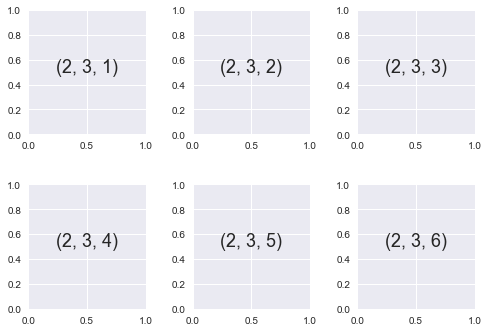

In [60]:
plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

An example of subplot

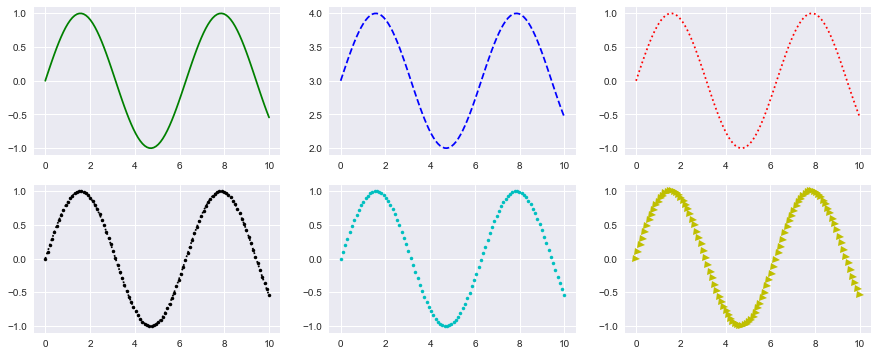

In [63]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, 2)
plt.plot(x, np.sin(x) + 3, '--b')
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '>y');

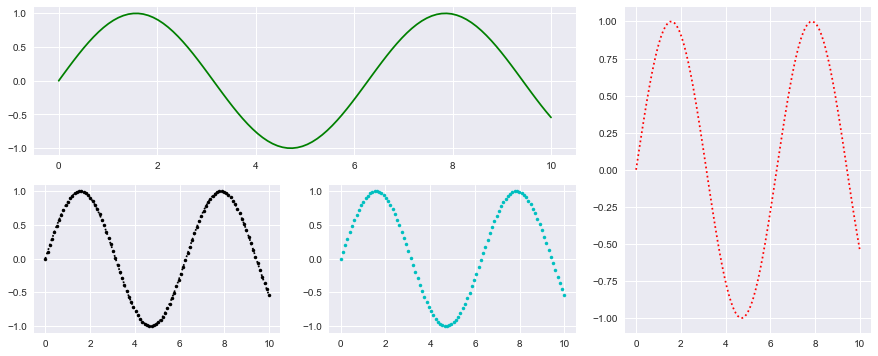

In [64]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,2))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (3,6))
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')

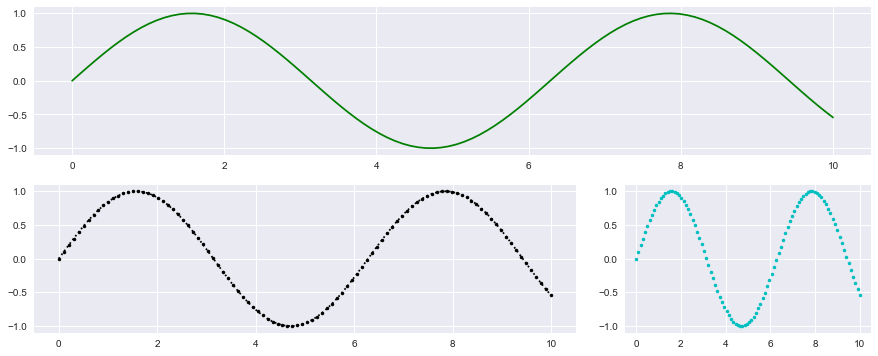

In [66]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,3))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (4,5))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c');

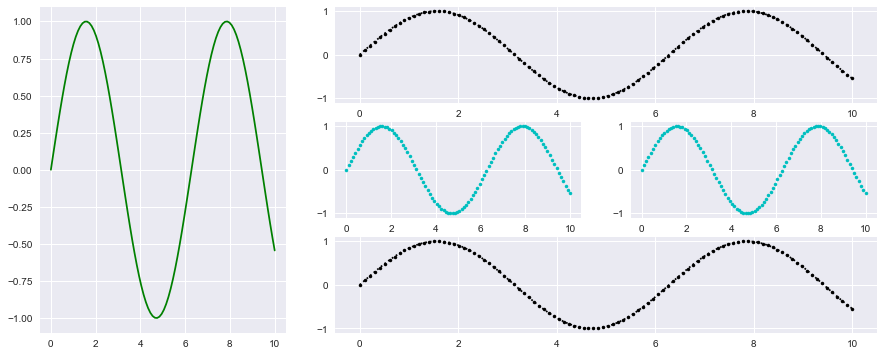

In [67]:
plt.figure(figsize=(15,6))
plt.subplot(3, 3, (1,7))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(3, 3, (2,3))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(3, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, (8,9))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.show()

## Text and Annotation
Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this. Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and importing the functions we will use:

Text(6, 7.5, 'Gradient (0.2, 0.2)')

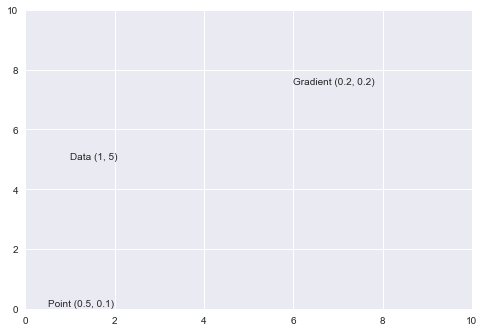

In [68]:
plt.axis([0, 10, 0, 10])
plt.text(1, 5, "Data (1, 5)")
plt.text(0.5, 0.1, "Point (0.5, 0.1)")
plt.text(6, 7.5, "Gradient (0.2, 0.2)")

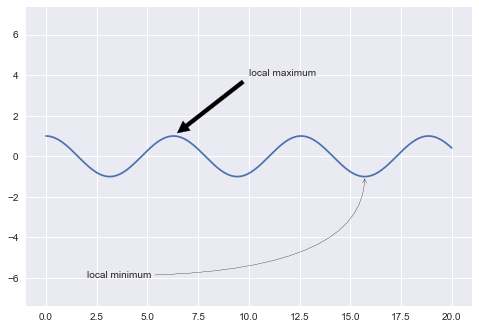

In [69]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

In this session, we will demonstrate various techniques for visualising data using both `matplotlib` and `pandas`. This will also include the correct interpretation and understanding of the different plotting techniques. The data to be used are `flight_data.csv` and `weather.csv`. They can both be found in the folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flight_data.csv')

In [3]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [4]:
df.shape

(336776, 19)

To reduce the amount of data we will be working with and make things a little easier, lets only look at _Alaska Airlines_ flights leaving from New York City in 2013. This can be done by subsetting the data in such a way that we only observe flights from Alaska Airlines (carrier code AS), as follows;

In [5]:
Alaska = df[df['carrier'] == 'AS']

This essentially picks out all of the rows within the flights data set for which the carrier code is AS and discards the rest, thus creating a new data set entitled Alaska. To observe the Alaska data we can use the following commands:

In [6]:
Alaska.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
78,2013,1,1,724.0,725,-1.0,1020.0,1030,-10.0,AS,11,N594AS,EWR,SEA,338.0,2402,7,25,1/1/2013 7:00
644,2013,1,1,1808.0,1815,-7.0,2111.0,2130,-19.0,AS,7,N553AS,EWR,SEA,336.0,2402,18,15,1/1/2013 18:00
949,2013,1,2,722.0,725,-3.0,949.0,1030,-41.0,AS,11,N592AS,EWR,SEA,314.0,2402,7,25,2/1/2013 7:00
1573,2013,1,2,1818.0,1815,3.0,2131.0,2130,1.0,AS,7,N552AS,EWR,SEA,332.0,2402,18,15,2/1/2013 18:00
1894,2013,1,3,724.0,725,-1.0,1012.0,1030,-18.0,AS,11,N533AS,EWR,SEA,325.0,2402,7,25,3/1/2013 7:00


In [7]:
Alaska.shape

(714, 19)

# Visualising the data 
## Scatterplots
This allows us to examine if there is any relationship between two variables, such as positive or negative correlation, and whether the relationship appears linear or not. Lets say we wanted to observe the relationship between departure and arrival delays. We can do that as follows:

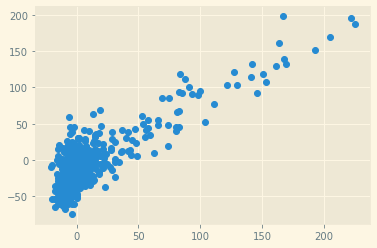

In [8]:
plt.style.use('Solarize_Light2')
plt.scatter('dep_delay', 'arr_delay', data=Alaska); 

## Adding labels to the axes

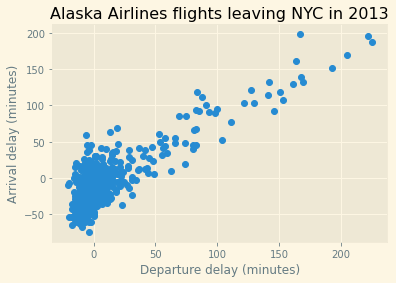

In [9]:
plt.scatter('dep_delay', 'arr_delay', data=Alaska)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

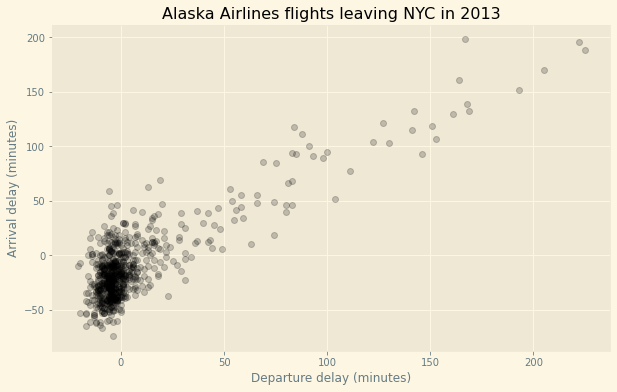

In [10]:
plt.figure(figsize=(10,6))
plt.scatter('dep_delay', 'arr_delay', data=Alaska, color='k', alpha=0.2)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

### Something to think about.
1. Why do departure and arrival delays appear to have a positive relationship?
2. Why is there a cluster of points at (0,0)? What does this indicate?

## Histograms
Histograms allow us to look at the statistical distribution of a variable. They show us how many values of a variable fall within specified bins. These bins give ranges of values for which the variable lies. The bins can be altered, that is, by changing their width, or by increasing the number of bins, such that we see the distribution at a higher resolution. Here, lets take a look at the weather data set. This data set contains hourly weather data from three airports (LGA, JFK and EWR) in New York City in 2013. 

In [11]:
weather = pd.read_csv('weather.csv')
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


Now, let us see  the distribution of the hourly temperature:

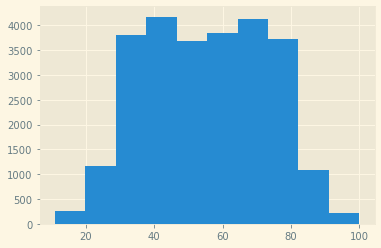

In [12]:
plt.hist(weather['temp']);

As mentioned earlier, we can view histogram as a higher resolution by increasing the number of bins.

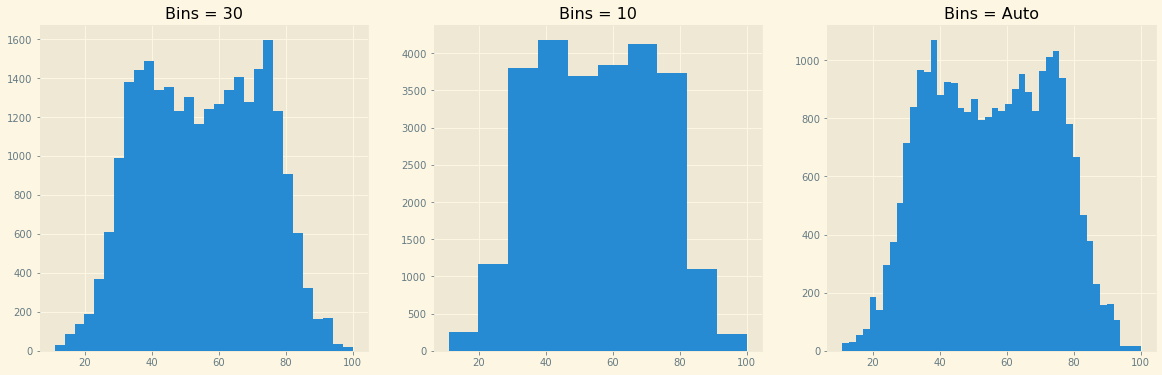

In [13]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Bins = 30')
weather['temp'].hist(bins=30)

plt.subplot(1,3,2)
plt.title('Bins = 10')
weather['temp'].hist(bins=10)

plt.subplot(1,3,3)
plt.title('Bins = Auto')
weather['temp'].hist(bins='auto')

plt.show()

Finally, let us plot a histogram with more information.

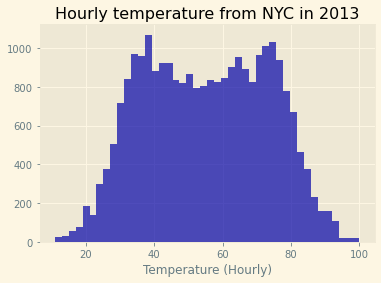

In [14]:
plt.style.use('Solarize_Light2')
plt.hist(weather['temp'], bins='auto', color='#0504aa', alpha=0.7)
plt.xlabel('Temperature (Hourly)')
plt.title('Hourly temperature from NYC in 2013')
plt.show()

### Something to think about
3. What does the histogram tell us about the hourly temperature levels from NYC in 2013?

## Boxplot
Another way to look at the distribution of a variable is using a boxplot. A boxplot makes use of the standard five-number summary, that is

* the minimum value;
* the first quartile or 25th percentile;
* the median (or 2nd quartile / 50th percentile);
* the third quartile or 75th percentile;
* and the maximum value.

Keeping with the hourly temperature data, the five-number summary can be obtained by using the following command:

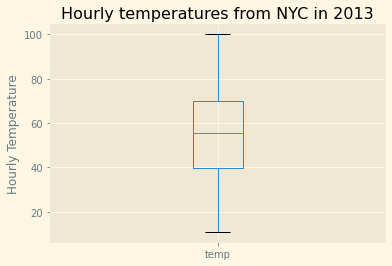

In [15]:
weather.boxplot('temp')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
plt.show()

We could look at how the hourly temperature changes by month:

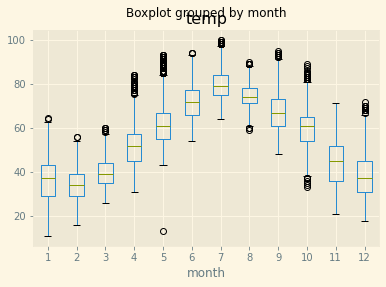

In [16]:
weather.boxplot('temp', by='month');

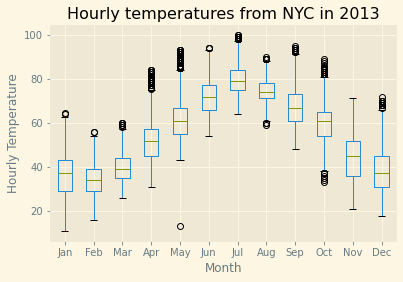

In [17]:
weather.boxplot('temp', by='month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(list(range(1, 13)), months);

### Something to think about
4. Which months have the highest variability in temperature?

## Barplots
Barplots, or barcharts, are used to visualise the distributions of categorical variables. This essentially provides us with the frequencies of categories within a categorical variable. Lets take a look at the distribution of airline carriers within the flights data that flew out of New York City in 2013. We can do this by creating a table containing the number of flights from each airline carrier as follows:

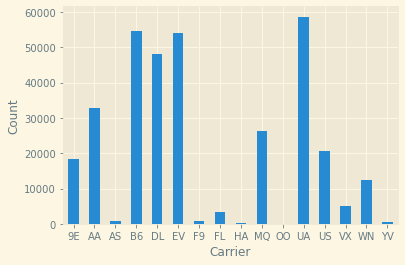

In [18]:
df.groupby('carrier').size().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

Barplots can also be used to compare two categorical variables. For instance, lets say we wanted to look atthe number of flights that flew out of New York York in 2013 from each carrier and from each airport (LGA, JFK and EWR). 

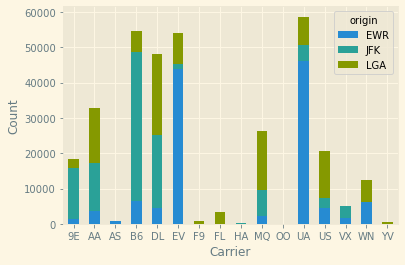

In [19]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

This provides us with a visually nice barplot to present our carrier information by airport of origin. However,there are also alternative barplots to the stacked barplot.  One alternative to a stacked barplot is theside-by-side(ordodged)barplot, which, as suggested by its name, places the bars next to each anotherinstead of on top of one another. This can be produced as follows

#### Faceted barplot

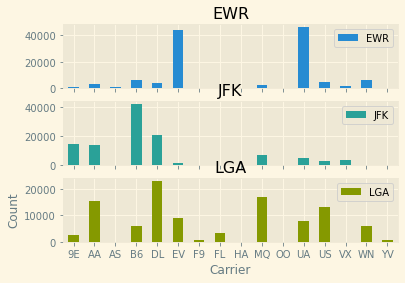

In [20]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', subplots=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

#### side-by-side barplot

Text(0, 0.5, 'Count')

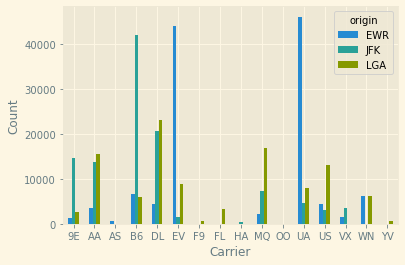

In [21]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count')

Linegraphs are typically used when looking at _time series_ data, that is, when we have information on how a variable changes over time. Hence, there is a natural ordering to the data when observing how something changes over time, and therefore, linegraphs should be avoided if there is no sequential ordering of a variable. Lets again look at the hourly temperature data, but this time only for Newark International Airport in January. This can be done by first subsetting the data as follows:

In [22]:
Newark_Jan = weather[(weather['origin'] == 'EWR') & (weather['month'] == 1)]
Newark_Jan

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,EWR,2013,1,31,19,33.08,15.08,47.10,270.0,20.71404,31.07106,0.0,1006.6,10.0,2013-02-01T00:00:00Z
738,EWR,2013,1,31,20,32.00,19.04,58.37,250.0,17.26170,26.46794,0.0,1007.3,10.0,2013-02-01T01:00:00Z
739,EWR,2013,1,31,21,32.00,10.04,39.38,260.0,28.76950,36.82496,0.0,1008.0,10.0,2013-02-01T02:00:00Z
740,EWR,2013,1,31,22,30.92,6.98,35.84,260.0,27.61872,35.67418,0.0,1008.5,10.0,2013-02-01T03:00:00Z


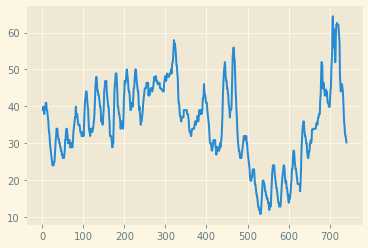

In [23]:
plt.plot(Newark_Jan['temp']);

## Seaborn Tutorial

Seaborn is a data visualization library built on top of Matplotlib. It is often used because it makes attractive visualizations and works easily with Pandas. While in Matplotlib you often have to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.

### Installing with pip <br>
`pip install seaborn`

### Installing with conda <br>
`conda install seaborn`

### import

In [1]:
pwd

'C:\\Users\\HOVE\\Desktop\\Vizualization'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [4]:
# You can import custom data
cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
cs_df

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,Michelle Samms,F,46,NY,17-BY3613DX,Laptop,609.99,140.34,Flyer 3,November,2019
98,99,Mick Roberts,M,23,PA,BB980,Desktop,889.99,110.89,Flyer 2,May,2019
99,100,Ed Klondike,M,52,OH,15M-ED0023DX,Laptop,989.99,111.34,Email,November,2019
100,101,Moe Eggert,M,35,PA,GMA4000BST,Desktop,589.99,138.64,Website,May,2019


In [6]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plots

### Distribution Plot

<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

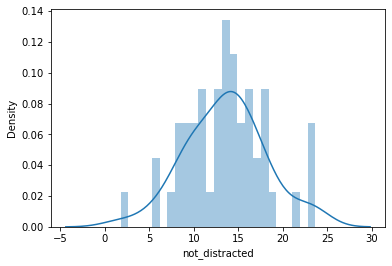

In [7]:
# Provides a way to look at a univariate distribution. A 
# univariate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(crash_df['not_distracted'], kde=True, bins=25)

### Joint Plot

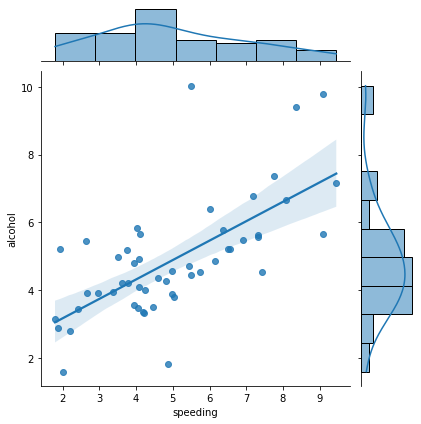

In [8]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

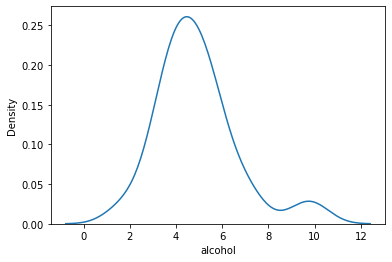

In [9]:
# Get just the KDE plot
sns.kdeplot(crash_df['alcohol'])

### Pair Plots

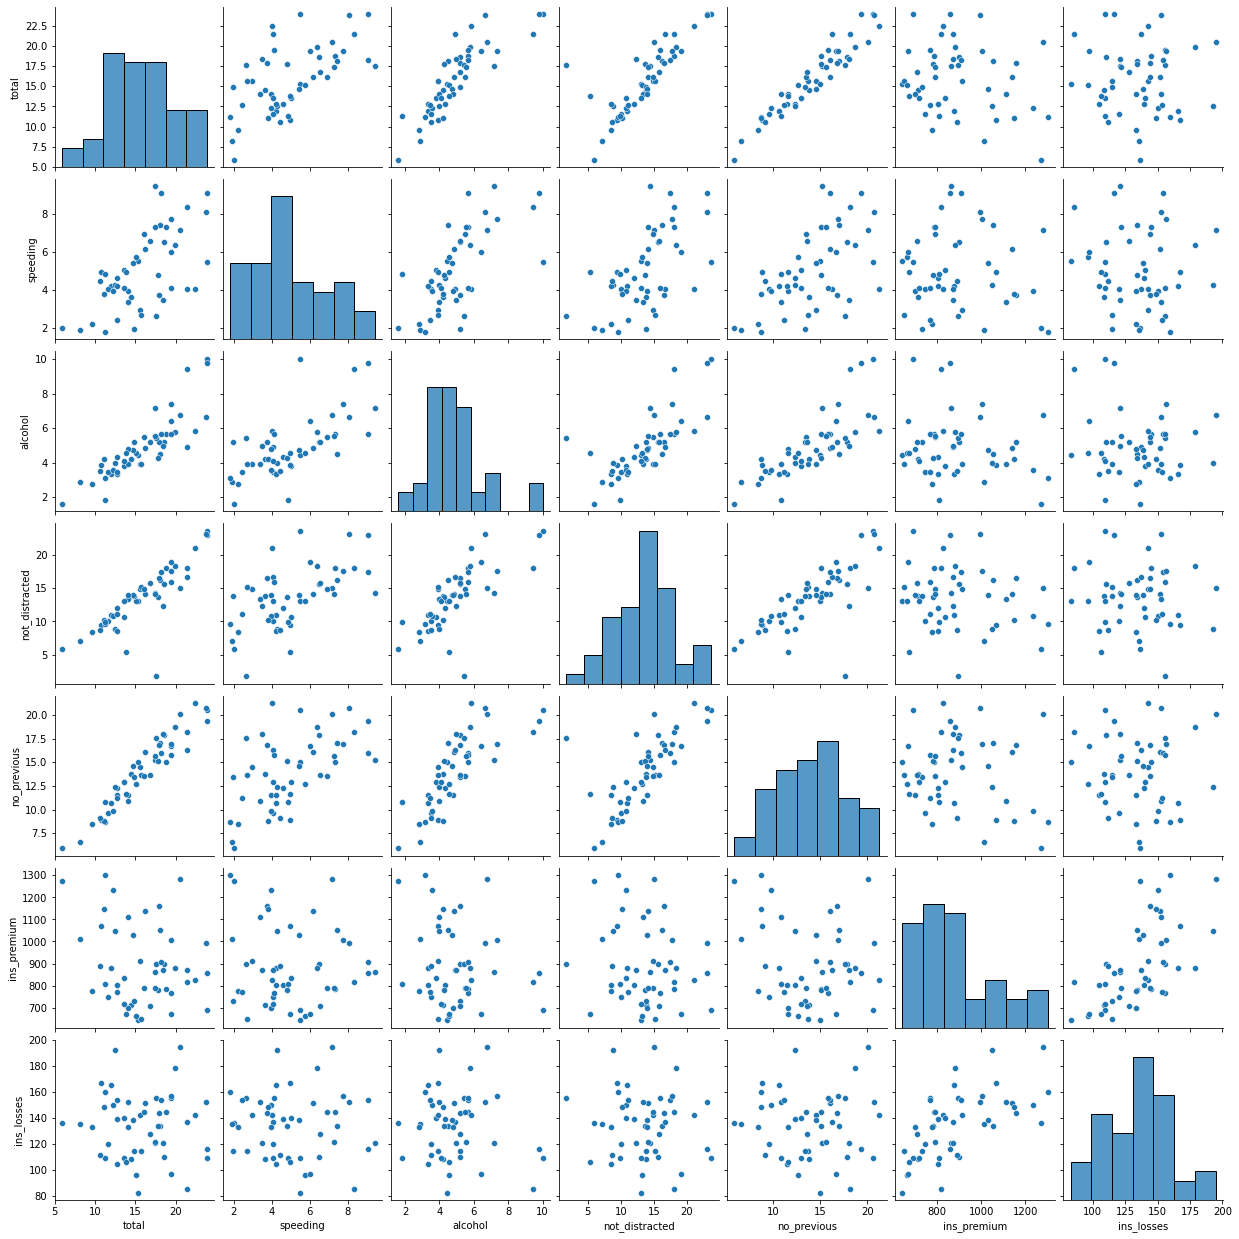

In [10]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)

# Load data on tips
tips_df = sns.load_dataset('tips')

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
# sns.pairplot(tips_df, hue='sex', palette='Blues')

### Styling

<Figure size 576x288 with 0 Axes>

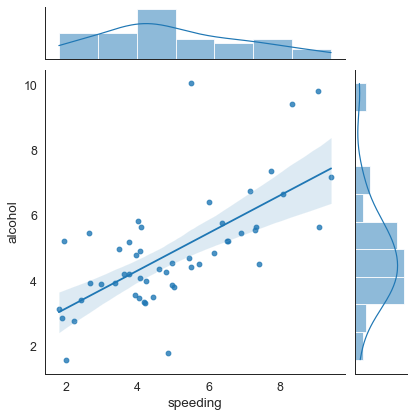

In [11]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('white')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

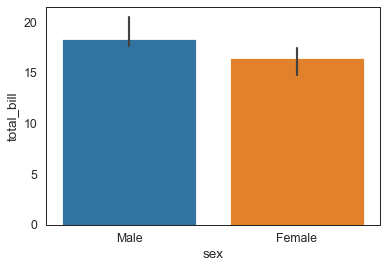

In [12]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

### Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

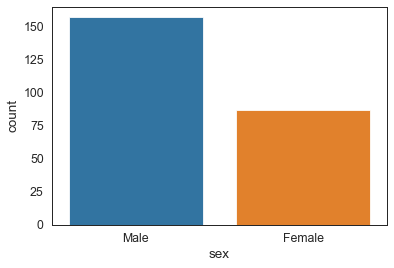

In [13]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='sex', data=tips_df)

### Box Plot

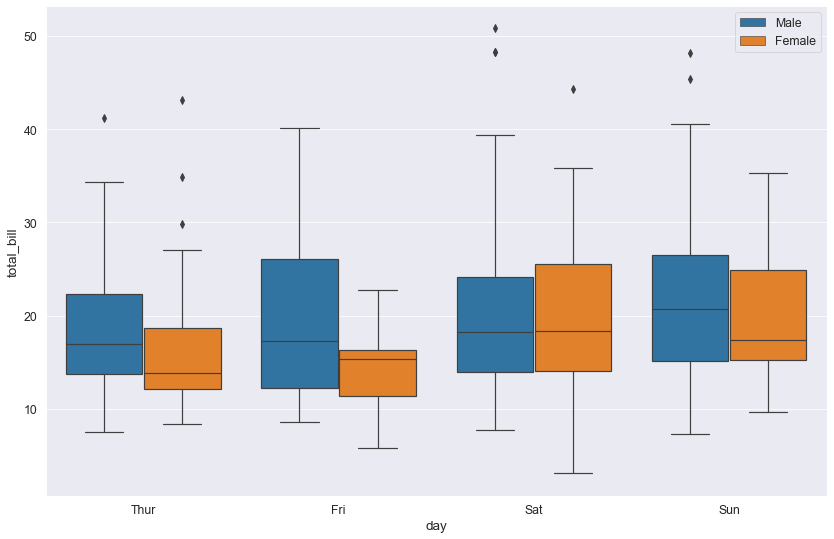

In [14]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

### Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

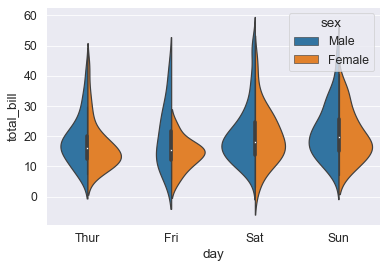

In [15]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

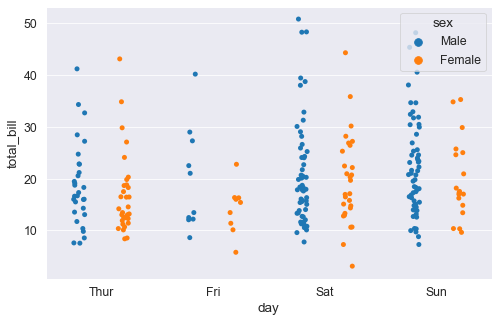

In [16]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

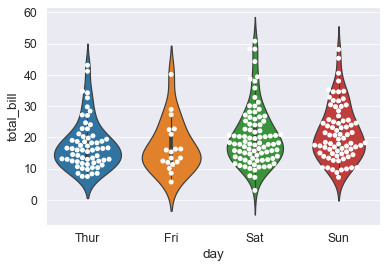

In [17]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')


### Palettes

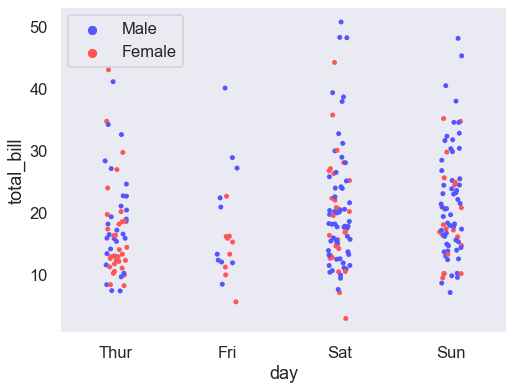

In [18]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)

### Matrix Plots

### Heatmaps

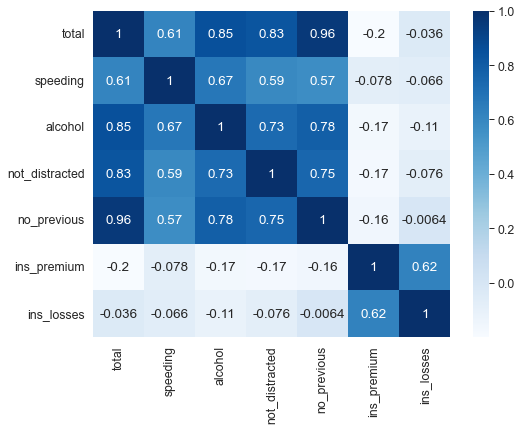

In [20]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues');

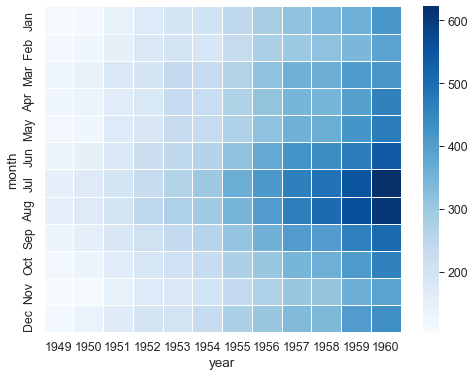

In [21]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1);

### Cluster Map

<Figure size 576x432 with 0 Axes>

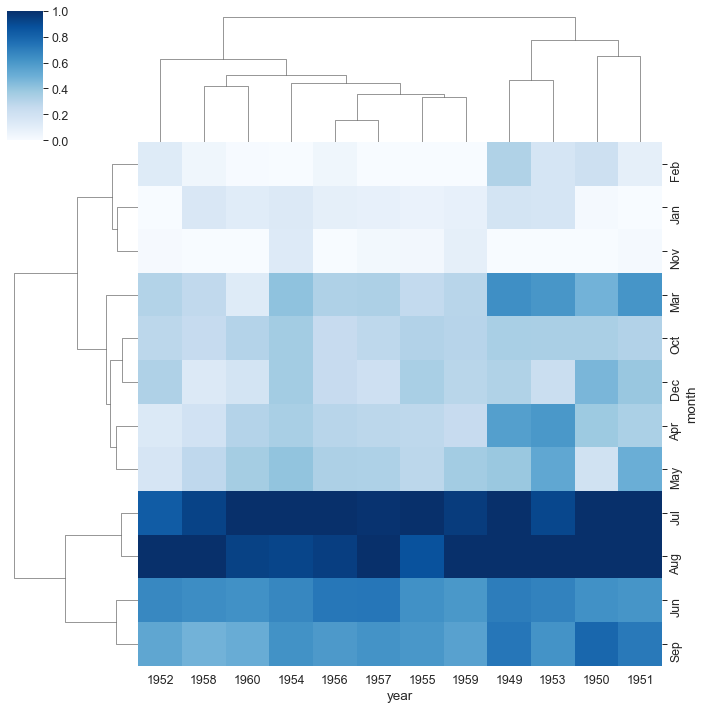

In [22]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
# Return values for species
# species = iris.pop("species")
# sns.clustermap(iris)

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
sns.clustermap(flights,cmap="Blues", standard_scale=1)


### PairGrid

<Figure size 576x432 with 0 Axes>

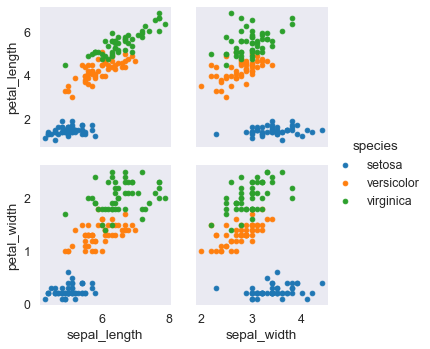

In [24]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend();

### Facet Grid

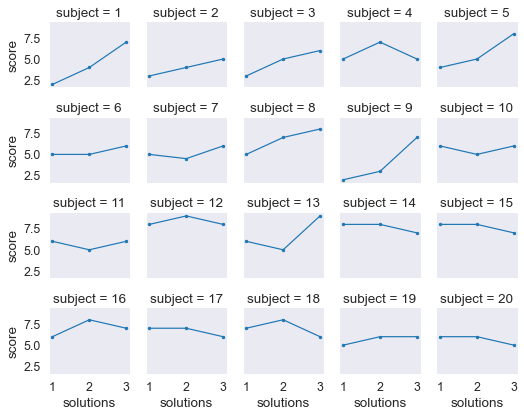

In [27]:

1

people_survive=dataset.loc[(dataset['survived']==1)&(dataset[['age'],['sex']])]
1

people_survive=dataset.loc[(dataset['survived']==1)&(dataset[['age'],['sex']])]
1

people_survive=dataset.loc[(dataset['survived']==1)&(dataset[['age'],['sex']])]
1

people_survive=dataset.loc[(dataset['survived']==1)&(dataset[['age'],['sex']])]# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.');

### Regression Plots

In [28]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

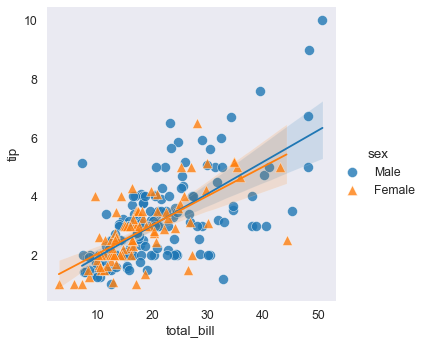

In [32]:
plt.figure(figsize=(8,6));
sns.set_context('paper', font_scale=1.4);

plt.figure(figsize=(8,6));

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});

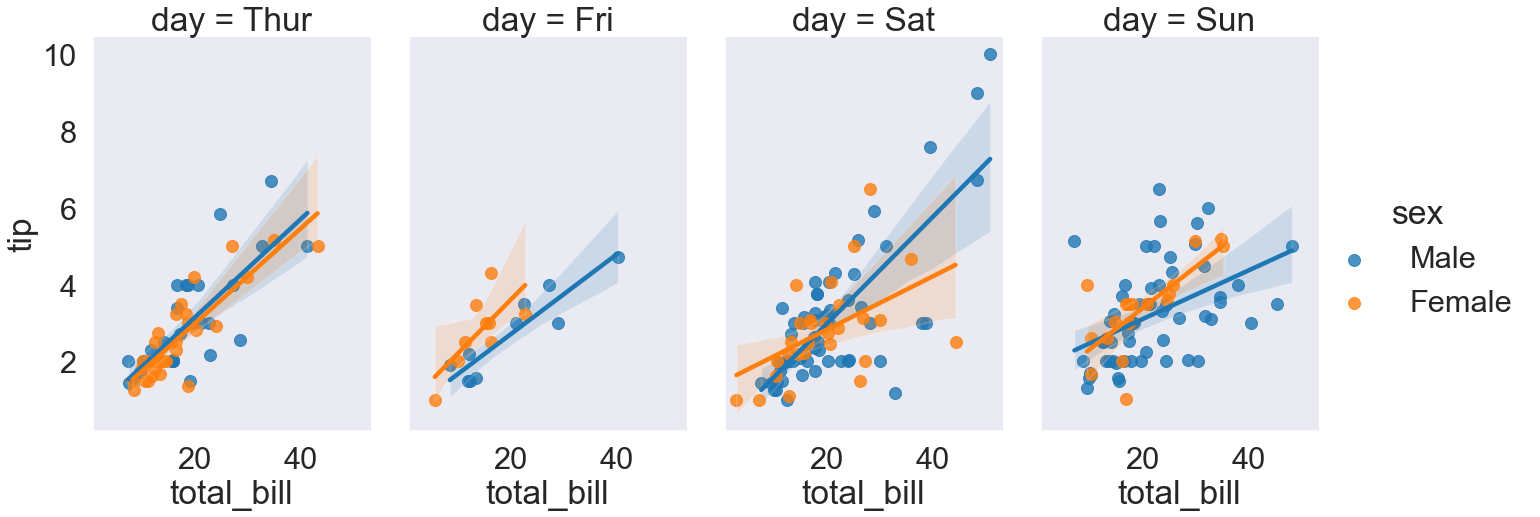

In [34]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6);

# Data Visualization
The focus of this module is to provide skills for visualization of different type datasets and to ensure that participants are comfortable with python packages for data visualization. In this module, we will learn about $\href{https://matplotlib.org/}{\text{matplotlib}}$ and $\href{https://seaborn.pydata.org/}{\text{seaborn}}$ which are python packages mostly used for visualising static statistical plots. Other python packages such as $\href{https://plotly.com/}{\text{plotly}}$, $\href{https://bokeh.org/}{\text{Bokeh}}$ and $\href{https://streamlit.io/}{\text{streamlit}}$ are used to visualize dynamic data.

Static data refers to a fixed data or, data that remains the same after it's collected. Dynamic data, on the other hand, continually changes after it's recorded in order to maintain its integrity.

We will first dive into `matplotlib`. `matplotlib` is a visualization library that is built on top of $\href{https://numpy.org/}{\text{NumPy}}$ and is designed to work along with $\href{https://www.scipy.org/}{\text{SciPy}}$. It is mostly used as a standalone package but in recent times, it is also used as wrappers on other packages including `pandas`.

For the first part of the session, we will use simple generated data. This data may act as a `Hello World!` for `matplotlib`. Afterwards, we will dive deeper by using `matplotlib` on DataFrames

## Installing `matplotlib`
One can install `matplotlib` using their python package. There are two python package manager and they are `pip` and `conda`. To install `matplotlib`, open your terminal or command prompt and type the code below. 

For those using `pip` as their python package manager, type; <br>
`pip install matplotlib` 

For those using `conda` as their python package manager, type; <br>
`conda install matplotlib`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

Let us start by creating a simple example.

In [ ]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
y = np.sin(x)
plt.plot(x, y) # calling for the plot function on x and sin(x)

 ## `show()` or No `show()` (How to display your plots)
A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context. 

In [ ]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x))     # calling for the plot function on x and sin(x)
plt.show()  # calling for the show function

Alternatively, you can use `;` to suppress such unwanted information. In python, `;` is used to suppress output.

In [ ]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 

plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

## Setting Styles
There are many styles in `matplotlib` that one can use. 

In [ ]:
plt.style.available?

In [ ]:
plt.style.use('seaborn')

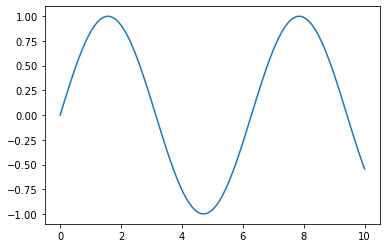

In [4]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

One can create a single figure with multiple lines by calling the `plot` function multiple times

In [ ]:
# Plotting multiple lines using matplotlib
plt.plot(x, np.sin(x))   # plotting the first line
plt.plot(x, np.cos(x));  # plotting the second line

## Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig() command. For example, to save the previous figure as a PNG file, you can run this:

In [ ]:
#plt.style.use('classic')
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure.png')   # calling savefig function to save the plot

## Plotting lines in `matplotlib`

As you can see in the previous plots, `matplotlib` chose the colors and the type of lines automatically. However, one can also set their own colors and line types. Let us look at some examples in the cells below.

In [ ]:
# changing the linestyles
plt.plot(x, x + 0, linestyle='solid')    
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

Alternatively, I can use short cuts to obtain the above plot exactly. 

|character|description|
| ----------- | ----------- |
|```-``` | solid |
|```--``` | dashed |
|```-.``` | dash-dot |
|```:``` | dotted |

In [ ]:
# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted

In [ ]:
# changing colours of lines
plt.plot(x, x + 0, color='black')  
plt.plot(x, x + 1, color='green') 
plt.plot(x, x + 2, color='red') 
plt.plot(x, x + 3, color='blue')
plt.show()

In [ ]:
plt.plot(x, x + 0, color='k')  # black line
plt.plot(x, x + 1, color='g')  # green line
plt.plot(x, x + 2, color='r')  # red line 
plt.plot(x, x + 3, color='b'); # blue line

This is the abbreviations for the colours available in `matplotlib`.

| character | color |
| ----------- | ----------- |
| ``'b'`` | blue |
| ``'g'`` | green |
| ``'r'`` | red |
| ``'c'`` | cyan |
| ``'m'`` | magenta |
| ``'y'`` | yellow |
| ``'k'`` | black |
| ``'w'`` | white |

An advantage of using `matplotlib`, is the ability to combine color choice and linestyle. Let us see the example in the cell below.

Next, let us look at some combinations.

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red

In [ ]:
plt.plot(x, x+0, '-g', x, x+1, '--c', x, x+2, '-.k', x, x+3, ':r');

Also, one can choose the type of marker they want. For example, in the cell below, we have `go--`. This will generate a green circle marker with dashed lines running in it.

In [ ]:
y = np.linspace(0, 10, 30)
plt.plot(y, np.sin(y), '>--', linewidth=2, markersize=5);

**Markers**

|character|description|
| ----------- | ----------- |
|```.``` | point marker|
|```,``` | pixel marker|
|```o``` | circle marker|
|```v``` | triangle_down marker|
|```^``` | triangle_up marker|
|```<``` | triangle_left marker|
|```>``` | triangle_right marker|
|```1``` | tri_down marker|
|```2``` | tri_up marker|
|```3``` | tri_left marker|
|```4``` | tri_right marker|
|```s``` | square marker|
|```p``` | pentagon marker|
|```*``` | star marker|
|```h``` | hexagon1 marker|
|```H``` | hexagon2 marker|
|```+``` | plus marker|
|```x``` | x marker|
|```D``` | diamond marker|
|```d``` | thin_diamond marker|
|```_``` | hline marker|

The general approach to the `plot` function is very simple;

```plot(x, y, [fmt], **kwargs)``` <br>
```plot(x, y, [fmt], x2, y2, [fmt], ..., **kwargs)```

## Adjusting the axes limits
The axes are adjusted by using `xlim` and `ylim` functions.

In [ ]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis

Alternatively, one can use the `axis` function. `axis()` method allows you to set the `x` and `y` limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`:

In [ ]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('equal');  # equal option creates a 1:1 aspect ratio

## Labeling plots

In [ ]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the `legend()` method. Though there are several valid ways of using this, it easier to specify the label of each line using the `label` keyword of the plot function:

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend

In [ ]:
plt.plot(x, np.sin(x), '-g')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b')   # adding the label argument for plot 2
plt.legend(['sin(x)','cos(x)']); # calling for the legend

## Scatter Plot

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape. 

In [ ]:
# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x), 'ok');

Mainly, and a more powerful method of creating scatter plots is the `scatter` function, which can be used very similarly to the `plot` function:

In [ ]:
# plotting scatter plot
plt.scatter(x, np.sin(x), marker='o', color='k');

### `plot` Versus `scatter`: A Note on Efficiency
Aside from the different features available in `plot` and `scatter`, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plot` can be noticeably more efficient than `scatter`. The reason is that `scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In `plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, `plot` should be preferred over `scatter` for large datasets.

## Plotting Histogram

In [ ]:
data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

In [ ]:
# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

An alternative to the cell above

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Customizing plot legends
Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `legend()` command, which automatically creates a legend for any labeled plot elements:

In [ ]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend();

But there are many ways we might want to customize such a legend. For example, we can specify the location and turn off the frame:

In [ ]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='upper right'); # adding positional argument to legend

We can use the `ncol` command to specify the number of columns in the legend and `title` to specify the title of the legend:

In [ ]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='lower center', ncol=2, title='keys');

## Creating Subplots
Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts. 

The most basic method of creating an axes is to use the `axes` function. `axes` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent `[left, bottom, width, height]` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [ ]:
plt.axes()  # standard axes
plt.plot(x, np.sin(x))
plt.axes([0.65, 0.65, 0.2, 0.2]); # new coordinated figure
plt.plot(x, np.cos(x));

### Simple Grids of Subplots
Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is `subplot()`, which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

In [ ]:
plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

An example of subplot

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, 2)
plt.plot(x, np.sin(x) + 3, '--b')
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '>y');

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,2))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (3,6))
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,3))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (4,5))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c')

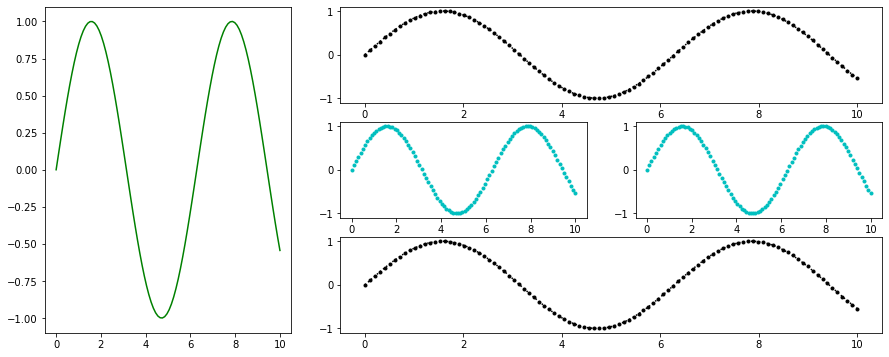

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(3, 3, (1,7))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(3, 3, (2,3))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(3, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, (8,9))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.show()

## Text and Annotation
Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this. Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and importing the functions we will use:

In [ ]:
plt.axis([0, 10, 0, 10])
plt.text(1, 5, "Data (1, 5)")
plt.text(0.5, 0.1, "Point (0.5, 0.1)")
plt.text(6, 7.5, "Gradient (0.2, 0.2)")

In [ ]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

**Exercise 4**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

In [1]:
#5pt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def SODE(a,b,H):
    # initial condition
    y0 = [2,8]
    
    # syst of odes
    def models(y,x):
        y,z = y
        dydx = z
        dzdx = 30*np.exp(3*x)-2*z
        return np.array([dydx,dzdx])

    # time points
    N = int((b-a)/H + 1)
    t = np.linspace(a,b,N)
    u = odeint(models,y0,t)
    return t, u[:,0]

2- Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

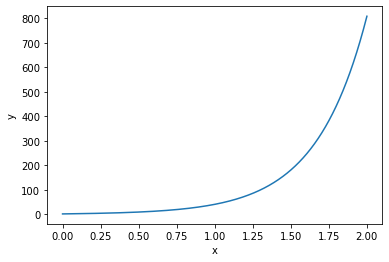

In [2]:
#4pt
t,ysol = SODE(0,2,0.001)
plt.plot(t,ysol)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

3- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

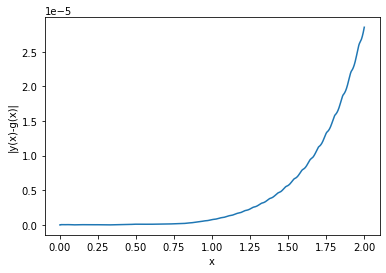

In [3]:
#3pt
g = 2*np.exp(3*t) - np.exp(-2*t) + 1
e = np.absolute(ysol-g)
# plt.plot(t,ysol,t,g)
plt.plot(t,e)
plt.xlabel('x')
plt.ylabel('|y(x)-g(x)|')
plt.show()

4- Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$

In [4]:
#3pt
#3pt
def L2_error(a,b,H):
    x,ysol = SODE(a,b,H)
    g = 2*np.exp(3*x) - np.exp(-2*x) + 1
    L2Er = (H*(ysol - g)**2)
    return sum(L2Er)

4- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [5]:
#3pt
Hj = np.array([10**-1,10**-2,10**-3,10**-4])
L2Erj = []
for i in Hj:
    L2Erj = np.append(L2Erj,L2_error(0,2,i))
print(L2Erj)

#3pt

# #======================== First Method ==================
# a = 0
# b = 2
# H = np.array([10**-1,10**-2,10**-3,10**-4])

# L2Er = np.zeros(4)
# for j  in range(4):
#   L2Er[j] = L2_error(a,b,H[j])

#======================== Second Method ==================
# a = 0
# b = 2
# Vec_L2_error = np.vectorize(lambda H:L2_error(a,b,H))
# H = np.array([10**-1,10**-2,10**-3,10**-4])
# L2Er = Vec_L2_error(H)
# print(L2Er)



# Hj = np.array([10**-1,10**-2,10**-3,10**-4])
# L2Erj = []
# for i in Hj:
#     L2Erj = np.append(L2Erj,L2_error(0,2,i))
# print(L2Erj)

[1.76688197e-10 1.34088211e-10 1.29754197e-10 1.31295082e-10]


5- Plot the array of $L2Er_j$ against the array of $H_j$.

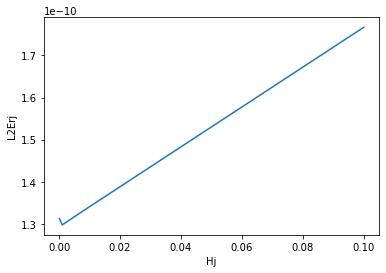

In [6]:
#3pt
plt.plot(Hj,L2Erj)
plt.xlabel('Hj')
plt.ylabel('L2Erj')
plt.show()

###  Introduction to python
Python is a programming language that boasts ease of use. Python as a language has gained a lot of recognition from the scientific community for the following reasons:

1. <b color='red'>Ease of Use</b> : Python as a language was created to be easy to use by even beginner programmers. It has been used in many institutions to teach introductory programming.
2. <b color='red'>Dynamic typing</b>: In python one can easily replace one variable value with another that is not the same data type. It does not enforce data types strictly and it does all the work in the background related to dynamic memory allocation for new data types.
3. <b color='red'>Batteries included</b>: The web page pypi.python.org has more than 10,000 python modules developped by developpers available for use. Modules include those for machine learning, image/signal processing, visualization, differential equations, interpolation, etc and are available for free download. Chances are, whatever you want to do, you can find a base module without resorting to reinventing the wheel.
## 1. Using Python as a Calculator
Python 3 can be used as a calculator to perform simple arithmetic operations such as addition (+), substraction (-), multiplication (\*), division (/), power (\**) and the remainder (%) and integer division (//).


In [ ]:
# print('7+2 = ',7+2)       #summation
# print('18-37 = ',18-37)   #substraction
# print('18*2 = ',18*2)     #multiplication
# print('20/3 = ', 20/3)    #division
# print('4**2 = ',4**2)     #powering
# print('10%3 = ', 10%3)    #remainder
# print('10//3 =',10//3)    #integer division

In [ ]:
# 1435//10**2

<b>NB: The symbol # is used for comments in python. Python will ignore anything that starts with a # sign till the end of the line.</b>

Python also supports the use of <b>parenthesis</b> to make evident the <b>order in which the calculations</b> are
performed.

In [ ]:
# (3*(4+6) - 12)/4 - 27//4

## 2. Variable Names and Assignment Operation
Variable names can take many forms, although they can only contain numbers, letters (both upper and
lower), and underscores (_). 
- They must begin with a letter or an underscore and are <b color='red' >case sensitive</b> meaning that python distinguishes between upper and lower case. E.g. Age, age and aGe are three different variables
- Additionally, some words are <b color='red'>reserved in Python</b> and so cannot be used for variable names (e.g. <b color='red'>import</b> or <b color='red'>for</b> ). 
- Double leading and trailing underscores are reserved for magic variable (e.g. init ), and so should be avoided except when specifically accessing a feature.
- the single equal sign (=) is used to assign a value the a variable

In [2]:
Age = 10
b =6
xxx = b + 2
print(Age)

print(xxx)

10
8


In [ ]:
Age =10
age = 20
aGe = 30
print('Age =', Age)
print('age =', age)
print('aGe =', aGe)

What will happen if I run the code bellow

In [3]:
xx = 10
print(XX)

NameError: name 'XX' is not defined

It is advisable to also use descriptive names for variables. This way, the purpose of the variable can be understood by others.

In [ ]:
students = 45
std_in_cls = 30
n = 100

The reserved Python names includes: and, else, if, print, assert, except, import, raise, break exec, in, return, continue, finally, is, try, def,for, lambda, while, del, from, not, elif, global
or, class, yield, pass.

Example of bad assignment

In [ ]:
#Not allowed
# x: = 1
# 1X = 10
# X-1 = 1
# for = 20

Multiple variables can be assigned on the same line using commas

In [ ]:
X, y, z = 1, 3.1415, 'a' # multiple assignments
# Age =10; age = 20; aGe = 30 # multiple assignments
print("X = ",X)

Other assignment operations include:
1. Add to (+=) or substract from (-=).
2. Multiply by (*=) or divide by (/=).
3. Remainder when divided by (%=).
4. Raise to power (**=).
This assignments operations are used to update the value of a variable that has already be defined.

In [5]:
volume = 7
volume += 3 # add 3 to the value of volume and store the result in volume
#volume = volume +3
# print(volume)
# # the value of volume is now 10
# volume *= 2 # multipy the value of volume by 2, store the result in volume
# volume = volume*2
# print(volume)
# 20 # the new value of volume is now 2
# volume %=3 # compute the remainder when divided the value of volume by 3, store the result in volume
print(volume)


10


## 3. Basics types
Python has some fundamental/built-in data types that are available with the raw installation. Examples include:

- <font color='blue'>Numeric data types</font>: 
    - Floating point numbers
    - Integers
    - Complex Numbers 
    - Boolean
- <font color='blue'>containers</font>
    - Strings
    - Lists
    - Tuples
    - Dictionaries
    - Sets

# 3.1. Numeric data types

# 3.1.1. Floatint numbers 
The most important (scalar) data type for numerical analysis is the float. Unfortunately, not all non- complex
numeric data types are floats. To input a floating data type, it is necessary to include a . (period, dot) in
the expression.

In [6]:
x = 2.0
type(x)

float

In [23]:
x = float("2.7")
# print(x)
y=5.6
# type(x)

The funtion type() is used to determine the data type of a variable.

# 3.1.2. Integer
Integers store numerical values without fractional parts. Integers therefore have no decimals. An integer is defined by just assigning a number to a variable without any decimals trailing. Example:

In [15]:
students = 20
type(students)

int

In [ ]:
# num = 0
# type(num)

In [ ]:
# num_ppl = 5
# type(num_ppl)

In [ ]:
aa = 666.5
x = int(aa)
print(x)
type(x)


# 3.1.3. Complex numbers
Complex numbers are also important for numerical analysis. Complex numbers are created in Python using $j$ where ($j^2 = -1$) or the function complex().

<b>Note: a + bj is the same as complex(a,b) , while complex(a) is the same as a + 0j.</b>

In [ ]:
x = 2 + 4j
type(x)

In [ ]:
x = complex(2,0)
print(x)
type(x)

Complex numbers posses certain properties. They have a real part and an imaginary part. They also have a conjugate. Which is the number with the same real part but the sign of the imaginary part changed. Python can calculate the conjugate of the complex number as a method and also return the real and imaginary parts of the number. These are built into the complex number as defined in python. 

- These attributes can be accessed using the dot operator (.) as in c.property or c.method(). 
- Methods are invoked with brackets at the end while properties are not. Essentially, the attributes are variables contained in the objects while the methods are functions built into the object. Example usage of attributes and methods of the string class are as follows

In [ ]:
cmp_num = 5+25j

In [ ]:
cmp_num.real

In [ ]:
cmp_num.imag

In [ ]:
a = cmp_num.conjugate
a()

In [ ]:
cmp_num.real()

# 3.1.4. Boolean
The Boolean data type is used to represent true and false, using the reserved keywords <b>True</b> and <b>False</b>. The following expressions return a boolean value,
- a == b
- a! = b
- a < b
- a > b
- a <= b
- a >= b
- a in b



In [ ]:
test = (3<4)
test
#type(test)

# 3.2. containers

# 3.2.1. String
In python, strings are defined by placing them between matching quotes. We have different string syntaxes (simple, double or triple quotes):

In [ ]:
# s1 = '33354666363.6677675'
# type(s1)

In [ ]:
# s2 = float(input('Enter a number: '))
# type(s2)

In [ ]:
# x = input('enter an integer: ')
# print(x)

In [ ]:
# s2 = "Hi, what's up"
# print(s2)

In [ ]:
# s3 = '''Hello,
#      how are you'''         # tripling the quotes allows the
# print(s3)                            # string to span more than one line

In [ ]:
# s4 = """Hi,
# what's up?"""
# print(s4)

In [ ]:
# s5 = 'Hi, what's up?'
# #s5 = "Hi, what's up?"
# print(s5)

This syntax error can be avoided by enclosing the string in double quotes instead of single quotes. Alternatively, one can prepend a backslash to the second single quote. Other uses of the backslash are, e.g., the newline character <b>\n</b> and the tab character <b>\t</b>.

In [ ]:
# s6 ="Hi,\nwhat's up?"#\n is used to continue the string on the next line
# print(s6)

In [ ]:
# s6 ="Hi,\twhat's up?"#\t is used to generate verticale space as tab
# print(s6)

# 3.2.1.1 String Manipulation

# a- <b>String operations</b>

- <font color=red>' '</font> or <font color=red>" "</font> is a string (empty string)
- if s1 and s2 are strings, then s1 + s2 is a string (string concatenation).

In [ ]:
# k = input('Enter a number :')
# kk = k+k
# #kkk = k + k + k
# print(kk)
# type(kk)

In [ ]:
# A = "Mali"
# B = "chi"
# C = A+B
# C

In [ ]:
# a = 'Python is'
# b = 'a rewarding language.'
# a  + b

In [ ]:
# "extra" + "ordinary" # string concatenation

In [ ]:
# a = "Tomatoes" # string repetition
# a*2

In [ ]:
# len(a) # string length

<b>Exercise 1</b>

1. Write an algorithm that asks the user for a positive integer $k$,  and compute and displays the value of $k+kk+kkk$. Translate into python code.

2. Write an algorithm that asks the user for a positive integer $k$ and $n$,  and compute and displays the value of $k+kk+kkk + kkkk+ ...+ kk...k$, the last term $kk...k$ has a length $n$. Translate into python code.

In [ ]:
# k=input('enter a positive interger :')
# kk=k+k
# kkk=k+k+k
# s=int(k)+int(kk)+int(kkk)
# s

In [5]:
k=input("please enter the positive enteger")
n=eval(input("please enter the positive enteger"))
s=0
for i in range(1,n+1):
    s=s+int(k*i)
print(s)


please enter the positive enteger1
please enter the positive enteger4
1234


# b- <b>String Indexing</b>

In [ ]:
a = "hello"
print(a[-3])# return the element at index 0
# #print(a[1]) #return the element at index 1
# #print(a[2]) # return the element at index 2

<b>Exercise </b>

Write a Python code that calculates and displays the sum of the digits in an integer given by a user.

In [8]:
n=input("please enter an integer")
sn=0
for i in str(n):
    sn=sn+int(i)
    
print(sn)

please enter an integer123
6


# c- <b>String slicing</b>

In [10]:
a = "hello, world!"
a[3:6] # 3rd to 6th (excluded) elements: elements 3, 4, 5

'lo,'

In [11]:
a[:6] # returns the first 6 charters (from index 0 to index 5)

'hello,'

In [ ]:
# a[4:] # returns all the charters from index 4 to the end

In [ ]:
# a[:-3] # returns all except the last 3 characters

In [ ]:
# a[::3] # every three characters, from beginning to end

In [ ]:
# a[2:10:2] # Syntax: a[start:stop:step]

A string is an <b>immutable object</b> and it is not possible to modify its contents.

In [12]:
a = "hello, world!"
a[2] = 'z'

TypeError: 'str' object does not support item assignment

# d- <b>String formatting</b>

Sometimes, we will like to print our data with a specific format. Python uses the format specifiers (%d, %s, %f, etc.) as a space holder for data
- %d is a space holder for integers
- %f is a space holder for float
- %s is a space holder for strings
- %0.3f is a space holder for a float rounded off to 3 decimal places
- %0.5e is a space holder for float in scientific notation, accurate to 5 decimal plac

In [26]:
T = input('enter a your name')
L = len(T)
print ("Your name %s has %d characters" %(T, L))
print ("Your name {} has {} characters".format(T, L))

enter a your nameHove
Your name Hove has 4 characters


In [13]:
a = 'An integer: %i; a float: %f; another string: %s' % (1, 0.1, 'string') # with more values use tuple after %
print(a)

An integer: 1; a float: 0.100000; another string: string


In [14]:
i = 102
filename = 'processing_of_dataset_%d.txt' % i   # no need for tuples with just one value after %
print(filename)

processing_of_dataset_102.txt


In [ ]:
# print("A 10 decimal places precision of the number %s is %0.10f" %('sqrt(2)' , 2**0.5))

Another way to print our data with a specific format is as follows

In [ ]:
q= 'jhhjjlh'
z = 3
'jhdff {} hbbvahwi {} hddvas'.format(q,z)

In [ ]:
T = input('enter a your name')
L = len(T)
print ("Your name {} has {} characters".format(T, L))

# <b>More String Functions</b>

In addition to treating strings as a data type on its own with string operations, string functions and string indexing, strings are python objects. Meaning that they are associated with data (string data type or text) and functions (or methods) acting on them. Classes and Objects will be covered in details later on in the course. Below is a list os string methods commonly used.

- S.isupper() # returns True if the string contains only uppercase characters.
- S.upper() # returns a copy of the string containing only uppercase characters.
- S.islower() # returns True if the string contains only lowercase characters.
- S.lower() # returns a copy the string containing only lowercase characters.
- S.isdigit() # returns True if the string contains only digits.
- S.endswith(substring) # returns True if the string ends with the substring substring.
- S.startswith(substring) # returns True is the string starts with the substring substring.
- S.split('substring') # returns a list of strings, such that the string is split by 'substring' and each portion is an element of the returned list. If substring is not specified, the string is split on whitespace.
- S.rstrip() # removes the end of line character \n (if any) at the end
- S.count(substring) # returns the number of times substring occurs within the string.
- S.find(substring) # returns the index within the string of the first (from the left) occurrence of substring. Returns -1 if substring cannot be found.
- S.rfind(substring) # returns the index within the string of the last (from the right) occurrence of substring. Returns -1 if substring cannot be found.
- S.index(substring) # returns the index within the string of the first (from the left) occurrence of'substring'. Causes an error if substring cannot be

In [15]:
#dir(Name_of_Object)

NameError: name 'lower' is not defined

In [ ]:
# s = "The quick brown fox jumps slowly over the lazy cow \n"

In [ ]:
# s.islower()

In [ ]:
# s.count("ow") # number of instances of ow

In [ ]:
# s.find("brown") # index of the first occurrence on brown

In [ ]:
# s.find("not here")

In [ ]:
# s.find("ow")

In [ ]:
# s.rfind("ow") # index of the first instance of ow, starting at the end

In [ ]:
# s.index("ow")

In [ ]:
# s.rindex("ow")

In [ ]:
# S = s.upper()
# print(S)

In [ ]:
# s.rstrip()

In [ ]:
# b = "Great, I am a student"
# b.split() #split wherever there is a white space

In [ ]:
# b.split(',') #split wherever there is a comma

In [ ]:
# b.split('am') #split wherever there is a am



## 3.2.2 Lists

Lists store a group of variables so they can be accessed individually or collectively. The list is a most versatile datatype available in Python which can be written as a <b>list of comma-separated
values (items) between square brackets.</b> The variables do not need to be of the same type and/or with repetition.

# a- Creating a list

- <b> Empty list </b>


List can be created empty or be populated during creation.

Creating an empty list is as simple as for example:

 [] or list() is a list (the empty list)

In [2]:
emp_list1 =[]
emp_list1

[]

In [ ]:
# emp_lis2 = list()
# emp_lis2

Creating by putting different comma-separated values between square brackets

In [ ]:
# List = [1, 3, 4.5]
# List

A list can contain multiple type of object. If L1 and L2 are lists, then L1 + L2 is a list (concatenation)

In [6]:
# List = [1, 3, 4.5]
# List2 = [7, 'kkk', 'comote', 0.9, [1,2,'toto']]
# L = List + List2  # this line does a list concatanation
# L

Python also makes it possible to create a numeric sequence as a list using the range function. In
this case, we can create the sequence a+di, i = 0, ..., n. This is equivalent to a, a+d, a+ 2d, . . . , a+
nd. This can be done using the range function as list(range(a,b,d)) or [*range(a,b,d)] where b = a + nd + 1.


In [7]:
# #Example
seq1 = list(range(0,11))  # since we omitted the stepsize, its default value is one.
seq1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# seq1 = [*range(0,11)]
# seq1

In [8]:
seq2 = list(range(0,11,2))
seq2

[0, 2, 4, 6, 8, 10]

In [ ]:
# seq2[1]

In [9]:
seq3 = list(range(0,-24,-3))
seq3

[0, -3, -6, -9, -12, -15, -18, -21]

Note that the range function expects all arguments (inputs to the funtion) to be integers. You
get an error when that restriction is not respected. 

Example


In [28]:
seq4 = list(range(0,-24,-3.0))
seq4

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
# seq5 = list(range(0,20))
# seq5

In [ ]:
# seq5 = list(range(20,0,-1))
# seq5

# b- Accessing and Updating Items (values) in Lists

- <b>Accessing</b>: The elements of lists and other iterables (sequences) can be accessed using their indexes. Sequence indexing in python begins from 0. So the first element is index 0, the second is 1, the third is 2 and so on. To access the first element in seq3, we type

In [ ]:
# seq3 = list(range(0,-24,-3))
# print(seq3)
# seq3[5] # access the 4th element of the list seq3

In [ ]:
# mylist2 = [0.0,"learn python",2+4j,2000,[1,2,3,4,5,6,7]]

mylist2 has different kinds of elements including two strings and a list. To access the elements
sequences contained in other sequences like in this case, we use two indices; the first one points to
the location of the inner list and the second the location of the element in the inner list. 

Example

In [ ]:
# mylist2[1][3]# since the 2nd element of the list is string then indexing can be applied

In [ ]:
# mylist2[0][0]# since the 1st element of the list is a float then indexing can't be applied

In [ ]:
# mylist2[4][3]# since the last element of the list is list then indexing can be applied

Python uses the negative index to return elements from the back of the list. In this sense, -1 is
for the last element, -2 for the element before the last and so on.


In [ ]:
# print(mylist2)
# mylist2[-1]

- <b>Updating</b>

In [ ]:
# mylist2 = [0.0, 'a', (2+4j), 2000, 'learn python', [1, 2, 3, 4, 5, 6, 7]]
# mylist2[1] = 2222
# print(mylist2)

# c- List Slicing
Apart from accessing individual elements, it is also possible to access a group of elements in a
sequence using a sequence. This is called slicing. The slicing operator in python is the colon (:).

Let L be a list, we can
- L[i:j]       yields elements from index i to index j-1.
- L[i: ]       yields elements from index i to the ends.
- L[ :j]       yields elements from the beginning to index j-1.
- L[i:j:k]     yields elements from index i to index j-1, taking only the k-th elements.
- L[ : ]       yields a copy of the list L.
- L[ ::k]      yields all the k-th elements of L starting at index 0.

In [ ]:
# print(seq1)
# seq1[::-1]

In [ ]:
# seq1[0:4:2]

In [ ]:
# seq1[::]

In [ ]:
# seq1[::-1]

# d- List Comprehension
List comprehension provides an elegant and compact way of creating lists. Many authors say it is used to create lists like mathematicians do in the area of sets. For example to create the list [ $x^3$  | $x$ is in the list [0 .. 9]] we can use the list comprehension


In [29]:
a = [x**3 for x in range(10)]
a

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

For [ $2^x$  | $x$ is in the list [0 .. 10]], we use 

In [31]:
#Ask students
a =[2**x for x in range(11)]
a

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

For the list [$(x,y)$|$ x $ ∈  [0 .. 5] and $y$  ∈  [5 .. 0] ], we have

In [32]:
a = [[x,y] for x in range(6) for y in range(5,-1,-1)]
print(a)

[[0, 5], [0, 4], [0, 3], [0, 2], [0, 1], [0, 0], [1, 5], [1, 4], [1, 3], [1, 2], [1, 1], [1, 0], [2, 5], [2, 4], [2, 3], [2, 2], [2, 1], [2, 0], [3, 5], [3, 4], [3, 3], [3, 2], [3, 1], [3, 0], [4, 5], [4, 4], [4, 3], [4, 2], [4, 1], [4, 0], [5, 5], [5, 4], [5, 3], [5, 2], [5, 1], [5, 0]]


how can I create a list of the 1st, 3rd,7th,9th, 11th elements a?

In [ ]:
# Ask the students

List comprehensions can include conditional statements. Let us modify a above so the list comprehension only has the elements with x and y even

In [ ]:
# b = [[x,y] for x in range(6) for y in range(5,-1,-1) if x%2==0 and y%2==0]
# print(b)

# e- Summary: Built-in Basic List Functions and Methods:

Let L, list1, list2 be three defined lists

- Function related to List itself
    - cmp(list1, list2): Compares elements of both lists.
    - len(list): Gives the total length of the list.
    - max(list): Returns item from the list with max value.
    - min(list): Returns item from the list with min value.
    - list(seq or set): Converts a tuple or set into list.
- Function related to item of List
    - L.append(item): Appends object item to list
    - L.count(item): count Returns count of how many times item occurs in list
    - L.extend(seq): Appends the contents of seq to list.
    - L.index(item): Returns the lowest index in list that item appears.
    - L.insert(index, Item): Inserts item into list at offset index
    - L.pop(item=list[-1]): Removes and returns last item from list
    - L.remove(item): Removes object item from list
    - L.reverse(): Reverses objects of list in place
    - L.sort([func]): Sorts items of list, use compare func if given

In [ ]:
# mylist = [0.9,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
# mylist.sort()
# mylist

In [ ]:
# mylist = [0.9,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
# mylist.append(11)
# mylist

In [ ]:
# mylist = [0.9,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
# print(mylist.pop())
# print(mylist)

To add multiple elements to the end of the list, the extend method is used. Extend allows to
add multiple elements to the list.

In [ ]:
# mylist.extend([ 'Eish', 13, 'daddy', 'comote'])
# mylist

In [ ]:
# mylist.append([ 'Eish', 13, 'daddy', 'comote']) # we add a list to a list
# mylist

Deep and shallow copy

In [ ]:
#shallow copy
L1 = [1,4,7,9]
print(L1[2])
L2 = L1
L2[2] = 5
print(L2)
print(L1[2])

#deep copy
L1 = [1,4,7,9]
L2 = L1.copy()
L2[2] = 5
#print(L2)
print(L1[2])

## 3.2.3. Tuples
A Python tuple is another iterable. A tuple is created using the bracket but accessed in the same
manner as lists are.


In [ ]:
# a = (1,2,3,4,5,6,7)

The values of the Tuples are accessed as same as the values of a list.

In [ ]:
# print(a[3])

But unlike a list, a tuple is unmutable

In [ ]:
# a[3] = 2

## 3.2.4. Set
A set is an unordered collection of items. Unlike sequence items such as lists and tuples, in which each
element is indexed, set elements are not indexed and <b>are not duplicated</b>.

# a- Constructing a set

- You can create an empty set using the function set()
- You can also create a set from a list using set(L) where L is the list
- You can also create a set from a string using set(S) where S is the string

In [ ]:
# X = set() #Creating empty set
# print('X = ',X)



# #Create set from a list
# Y = ["emile",1,2,"w","v",2,"emile"]
# Z = set(Y) # passing a list
# print('Z = ', Z)
# S = 'bananas'
# W = set(S)
# print('W = ', W)

# b- Accessing
<b> Note that you can't access the set element using indeces since the element of the set are not orderred. </b>

In [ ]:
# list(W)[2]

But you can access the element of the set by converting them into list first.

In [ ]:
# S = 'bananas'
# W = set(S)
# print('W = ', W)
# aa = list(W)[2]
# print('aa = ', aa)

# c- Sets methods

add(), update(), copy(), discard(), clear()

In [ ]:
# x = set([1, 4, 6,'blue'])
# x.add(5) # adding a new element
# x

In [ ]:
# x.update([4, 1, 7]) # adding a list of new elements, avoiding repetition
# x

In [ ]:
# """
# x.remove(element) acts exatly like x.discard(element) except that it will
# yield an error if element is not in x
# """
# x.discard(4) # remove an element from x
# x

# d- Sets operations

- Union
- intersection
- difference
- symetric difference

In [ ]:
# X = set([1,2,3,4])
# Y = set([0,2,4,5])
# X.union(Y) # sets union
# #  X|Y # same as X.union(Y)

In [ ]:
# X.intersection(Y) # sets intersection
# #X & Y # same as X.intersection(Y)

In [ ]:
# X - Y # sets difference

In [ ]:
# X^Y # set symmetric difference

## 3.2.5. Dictionaries
A dictionary is a set of key:value elements. An element key:value is accessible by its key rather than by an
index. As opposed to lists, strings and tuples, the ordering of the elements of a dictionary does not matter.
Keys can be of any non-mutable type, and values can be of any type including other dictionaries, lists, or
tuples.
# a- Creating  dictionary

In [ ]:
# X= {}
# type(X)

In [ ]:
# Y = dict()
# type(Y)

In [ ]:
# count_cap = {'Benin': 'Porto-Novo','Togo': 'Lome', 'Cameroon': 'Yahounde', 'Nigeria': 'Abuja', 'Rwanda': 'Kigali', 'Kenya': 'Nairobia'}

In [ ]:
# count_cap

In [ ]:
# count_pop = {'Benin': 10000000,'Togo': 9000000, 'Cameroon': 30000000, 'Nigeria': 150000000, 'Rwanda': 12000000, 'Kenya': 47000000}

In [ ]:
# count_pop

# b- Adding and Updating items in a dictionary

In [ ]:
# Record = {'Name': 'Jean Irenee', 'Age': 7, 'Class': 'First'};
# Record['Age'] = 20; # update existing entry
# Record

In [ ]:
# Record['School'] = "AIMS"; # Add new entry
# Record

# c- Deleting items in a dictionary

In [ ]:
# del Record['Name']; # remove entry with key ’Name’
# Record

In [ ]:
# Record.clear(); # remove all entries in dict
# Record

# d- Built-in Dictionary Functions and Methods:

Let dict, dict1 and dict2 be three defined  dictionaries

-  Function related to Dictionary itself
    - cmp(dict1, dict2): Compares elements of both dict.
    - len(dict): Gives the total length of the dictionary.
    - str(dict): Produces a printable string representation of a dictionary.
- Function related to item of Dictionary
    - dict.clear(): Removes all elements of dictionary dictionary
    - dict.copy(): Returns a shallow copy of dictionary dictionary
    - dict.fromkeys(): Create a new dictionary with keys from seq and values set to value.
    - dict.get(key, default=None): For key key, returns value or default if key not in dictionary.
    - dict.has key(key): Returns true if key in dictionary dict, false otherwise
    - dict.items(): Returns a list of dict’s (key, value) tuple pairs
    - dict.keys(): Returns list of dictionary dict’s keys
    - del dict[key]: delete entry with key key
    - dict.update(dict2): Adds dictionary dict2’s key-values pairs to dict
    - dict.values(): Returns list of dictionary dict’s values
    






# e- Traversing a dictionary with a for loop

In [ ]:
# D = { 1: "one", "two": 2, (1, 3): "A key can be a tuple"}
# for keyey in D:
#     print(keyey, ": ", D[keyey]) # indentation

<b>Turning Keys Into Values and Vice Versa</b>
Suppose you have a dictionary and for some reason need to turn keys into values and vice versa. In this situation, you can use a for loop to iterate through the dictionary and build the new dictionary by using the keys as values and vice versa:


In [ ]:
# a_dict = {'one': 1, 'two': 2, 'thee': 3, 'four': 4}
# new_dict = {}



# for key, value in a_dict.items():
#     new_dict[value] = key
# new_dict

<b> Exercise </b>

Write a Python program to count the number of characters (character frequency) in a word enter by a user.

For example,if the user enter the word <font color = red> google  </font> 

the output should be <font color = red> {'g': 2, 'o': 2, 'l': 1, 'e': 1} </font>


In [ ]:
# s =  input("Enter a string: ")

# d =  set(s)#convert the string s into a set of induvidual characters

# result = {}# create empty dictionary

# for key in d:# loop over the characters in the set d
#     value =  s.count(key)#number of time key appears in s
#     result[key] = value# add key:value to dictionary result
# print(result)

In [ ]:
# str1 = input('Enter your word')
# Num_Char = {}
# for n in str1:
#     keys = Num_Char.keys()
#     if n in keys:
#         Num_Char[n] += 1
#     else:
#         Num_Char[n] = 1
# Num_Char

## 4- Functions in python
- A function is a group of statements that exist within a program for the purpose of performing a specific task. For example: <b> print, range, len(),.. </b>
- Most programs perform tasks that are large enough to be broken down into subtasks

- Because of this, programmers often organize their programs into smaller, more manageable chunks by writing their own functions

- Instead of writing one large set of statements we can break down a program into several small functions, allowing us to “divide and conquer” a programming problem

- Functions, like variables must be named and created before you can use them

- The same naming rules apply for both variables and functions

# 4.1. lambda functions 

Python provides the keyword lambda which is used to create anonymous functions. These are functions assigned to variables and they are generally short functions. In the case of lambda, usually, one liners. The syntax of the lambda statement is:

$$ \text{varname = lambda variables: function_statement} $$

Examples are:

In [ ]:
# f = lambda x: x**2 + 2*x + 1
# g = lambda x,y : x**y
# sign = lambda x: 1 if x > 0 else -1 if x < 0 else 0
# x = 1
# y = 2
# f_x = f(x)
# g_xy = g(x,y)
# sign_x = sign(x)

# # print('f({}) = {}'.format(x,f_x))
# # print('g({},{}) = {}'.format(x,y,g_xy))

In [ ]:
# h = lambda x,y,u : x**3 + u**3+ y*3 + x*y*u
# h(10,20,100)

The expression used inside the sign function is an example or a conditional expression or a ternary operator. This evaluates x and returns 1 if x > 0 if not it goes into the else expression where we have another ternary operator that test whether X < 0. 

# 4.2. Complex functions 
More complex functions are defined using python's <font color = red> def  </font> statement. <font color = red> def  </font> has the following syntax:
$$ \text{def funcname(var_list):} $$
$$ \text{statement_1} $$
$$ \text{statement_2} $$
$$ \cdots \text{       } $$
$$ \quad\text{return statement} $$

- <font color = red> def  </font>  is a block statement. This means the rules of working with python blocks apply. 
- The def statement is part of the block heading which ends in a colon. The body of the block is indented. The return statement transfers control back to the calling function. 
- The return statement can be just the return statement or return followed by an object that is returned as the result of the function evaluation. Example:



In [ ]:
# def f(x):
#     y = x**2 + 2*x +1
#     return y

# def g(x):
#     return x**2 + 2*x +1

# def h(x,y):
#     return x**y

# def sign(x):
#     if x > 0:
#         return 1
#     elif x < 0:
#         return -1
#     else:
#         return 0

- When you run a function you say that you “call” it

In [ ]:
# def disk_area(radius, height):
#      return 3.14 * radius * radius*height

    
# # Function call via the values of the inputs. In this case, the order of the values matter.
# Area1 = disk_area(3,5)
# print("For raduis = 3 and height = 5, we have area =",Area1)
# Area2 = disk_area(5,3)
# print("For raduis = 5 and height = 3, we have area =",Area2)


# # Function call via the name of variables that has been assigned a values a priori. In this case, the order of the values matters.
# r = 3
# h = 5
# Area3 = disk_area(r,h)
# print("For raduis = 3 and height = 5, we have area =",Area3)
# Area4 = disk_area(h,r)
# print("For raduis = 5 and height = 3, we have area =",Area4)

# #by using the name of input variables with values assignment. In this case, the order doesn't matter.
# Area5 = disk_area(radius = 3,height = 5)
# print("For raduis = 3 and height = 5, we have area =",Area5)
# Area6 = disk_area(height = 5,radius = 3)
# print("For raduis = 5 and height = 3, we have area =",Area6)





- Functions must be defined before they can be used. In Python we generally place all of our functions at the beginning of our programs.

In [ ]:
# v = PeriRectangle(L,l)

# def PeriRectangle(L,l):
#     return 2*(L+l)



**Flow of Execution with Functions**
- Once a function has completed, Python will return back to the line directly after the initial function call


<img src="fig1.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

================================================================================
<img src="fig2.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

================================================================================
<img src="fig3.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

================================================================================
<img src="fig4.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

================================================================================
<img src="fig5.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

================================================================================
<img src="fig6.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

================================================================================
<img src="fig7.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

================================================================================
<img src="fig8.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

================================================================================
<img src="fig10.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

================================================================================
<img src="fig10.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

<b> Exercise</b> (Bissection method)

Given the following function $ f(x) = x^3 -3x - 5;$ let $x_0 \in [a,b]=[-10,10]$ be the solution of the equation $f(x) = 0$. 

- Write a function named Bissection1 that return an approximation $\bar{x}$ of $x_0$ such that $$ \mid \bar{x} - x_0 \mid \leq \epsilon, $$
for a given parameter, $\epsilon>0$.

- Test your function Bissection1 for $ \epsilon = 10^{-3}$

- Write the function named Bissection2 that complete the same task but has as parameters $f,a,b,\epsilon$.

- Test your function Bissection2 for $ f(x) = x^3 -3x - 5, \epsilon = 10^{-3}, a=-10 \text{ and } b=10$

# 4.3. Returning Multiple Values functions
<font color = red> def  </font> has the following syntax to return multiple values:
$$ \text{def funcname(var_list):} $$
$$ \text{statement_1} $$
$$ \text{statement_2} $$
$$ \cdots \text{       } $$
$$ \qquad\qquad\qquad\qquad\qquad\text{return output_1, output_2, }\cdots,\text{output_n} $$


In [ ]:
# def SomProd(x,y):
#     S = x+y
#     P = x*y
#     return S,P


# x1= 0
# y1 = 8
# a,b = SomProd(x1,y1)

# print("For x=",x,", y=",y," we have  x+y = ", a,"x*y=",P)

**Exercise** write a function, called sum_prod, that takes $n$ and $M$ as input and return return A and B given by $$A = \sum_{i=m}^{n} i, \quad B = \prod_{i=m}^{n} i $$
    
    



<b> Exercise</b> (Bissection method)

- Considering the bissection exercise above, write a function named Bissection3 that takes the same input as Bissection2 and return the approximation value $\bar{x}$ and its image $f(\bar{x})$.

- Test your function Bissection3 for $ f(x) = x^3 -3x - 5, \epsilon = 10^{-3}, a=-10 \text{ and } b=10$

# 4.3. functions with default values

Keyword arguments allow you to specify default values. Default values are evaluated when the function is defined, not when it is called. For example,

In [ ]:
# def P(t,x = 2):
#     y = x**2 + 1 + t
#     return y

# aa = P(2,5)
# print(aa)

In [ ]:
P(2)

<b>This can be problematic when using mutable types (e.g. dictionary or list) and modifying them in the function body, since the modifications will be persistent across invocations of the function.</b>

In [ ]:
# def add_to_dict(args={'a': 1, 'b': 2}):
#     for i in args.keys():
#         args[i] += 1
#     print(args)
    
# #add_to_dict()    

In [ ]:
add_to_dict() 

<b>Shallow copy vs Deep copy of mutable variable</b>

In [ ]:
# def add_to_dict1(args={'a': 1, 'b': 2}):
#     dic = args.copy()
#     for i in dic.keys():
#         dic[i] += 1
#     print(dic)
    
# add_to_dict1()   

In [ ]:
add_to_dict1()   

## 4.4. Local Variables

- Variables that are defined inside of a function are considered “local” to that function.

In [ ]:

1

people_survive=dataset.loc[(dataset['survived']==1)&(dataset[['age'],['sex']])]# def bugs():
#     numbugs = int(input("How many bugs?"))
#     print (numbugs)
# # bugs()

- This means that they only exist within that function. Objects outside the “scope” of the function will not be able to access that variable

In [ ]:
# def bugs():
#     numbugs = int(input("How many bugs?"))
#     print(numbugs)
# bugs()
# print (numbugs) # error! Variable numbugs doesn’t exist in this scope!

- Different functions can have their own local variables that use the same variable name
- These local variables will not overwrite one another since they exist in different “scopes”

In [ ]:
# def newjersey():
#     numbugs = 1000
#     print("NJ has", numbugs, "bugs")
# def newyork():
#     numbugs = 2000
#     print("NY has", numbugs, "bugs")

    
# newjersey()
# newyork()

## 4.5. Passing by value

If the value passed in a function is immutable, the function does not modify the caller’s variable. If the value is mutable, the function may modify the caller’s variable in-place:


In [ ]:
# def try_to_modify(x, y, z):
#     x = 23
#     y.append(42)
#     z = [99] # new reference
#     print(x)
#     print(y)
#     print(z)

In [ ]:
# a = 77
# b=[99]
# c=28

# # prop 1: 77,[99,42], [99]

# # prop 2: 23,[99,42], [99]

In [ ]:
# a = 77    # immutable variable
# b = [99]  # mutable variable
# c = [28]
# try_to_modify(a, b, c)

In [ ]:
print('a = ', a)

print('b = ',b)

print('c = ',c)

Functions have a local variable table called a local namespace.

The variable x only exists within the function try_to_modify.

# 4.6. Global variables

Variables declared outside the function can be referenced within the function:


In [ ]:
# z = 6
# def f1(x):
#     y = x**2 + z
#     return y



In [ ]:
# f1(2)


In [ ]:
# print(z)

<b>But these “global” variables cannot be modified within the function, unless declared global in the function.</b>

In [ ]:
# x = 10
# def setx(y):
#      x = y
#      print('x is %d' % x)
    
# setx(5)

In [ ]:
# print(x)

In [ ]:
# x=10
# def setx1(y):
#     global x
#     x = y
#     print('x is %d' % x)
    
# setx1(5)
        

In [ ]:
# print(x)


# Exercise 1
Write a shutting down program:

First, define a function, shut_down, that takes one argument s. Then, if the shut_down function receives an s equal to "yes", it should return "Shutting down" Alternatively, elif s is equal to "no", then the function should return "Shutdown aborted". Finally, if shut_down gets anything other than those inputs, the function should return "Sorry".

In [17]:
def shut_down(s):
    if s=='yes':
        return 'shutting down'
    elif s== 'no':
        return 'shutdown aborted'
    else:
        return 'sorry'

In [18]:
shut_down('yes')

'shutting down'

In [19]:
shut_down('hove')

'sorry'

# Exercise 2
First, define a function called distance_from_zero, with one argument (choose any argument name you like). If the type of the argument is either int or float, the function should return the absolute value of the function input. Otherwise, the function should return "Nope". Check if it works calling the function with -5.6 and "what?".

In [22]:
def distance_from_zero(x):
    if type(x)==int or type(x)==float:
        return abs(x)
    
    else:
        return 'Nope'

# Exercise 3
Follow the stpes:

First, define a function called cube that takes an argument called number.
Make that function return the cube of that number (i.e. that number multiplied by itself and multiplied by itself once again).
Define a second function called by_three that takes an argument called number. if that number is divisible by 3, by_threeshould call cube(number) and return its result. Otherwise, by_three should return False. -Check if it works.

In [24]:
def cube(num):
    return num**3

def by_three(number):
    if number%3==0:
        return cube(number)
    else:
        return False

by_three(4)


False

# Exercise 4
Write a Python function that accepts a string and calculate the number of upper case letters and lower case letters. Check for 'The quick Brow Fox and 'I am proud of Mr McDonald'.

In [30]:
def string(s):
    x=0
    y=0
    for i in s:
        x+=i.isupper()
        y+=i.islower()
    return x
    return y
print("the number of upper case and lower case letter are: ",string("TGTHTTHosiane"))


the number of upper case and lower case letter are:  (7, 6)


In [31]:
def characterCase(S):
    result =  {"up":0,"lc":0}
    for c in S:
        if c.isupper() == True:
            result["up"] += 1
        elif c.islower():
            result["lc"] += 1
    return result
characterCase("The quick Brow Fox and 'I am proud of Mr McDonald")

{'up': 7, 'lc': 31}

# Exercise 5
Write a Python function to calculate the factorial of a number (a non-negative integer). The function accepts the number as an argument.

In [32]:
def factorial(n):
    
    if n ==0 or n ==1:
        return 1
    else:
        return n * factorial(n-1)
    
factorial(3)

6

# Exercise 6

Write a Python function called <b> InRange </b>to check whether a number is in a given range. For example for $[0,100]$, the output of 20 should appear: 20 is in the range. in addition, if the number is outside the range, print the following message: The number is outside the given range.


In [33]:
def InRange(n,r):
    if n>=r[0] and n<=r[1]:
        return '{} is in the range'.format(n)
    return 'The number is outside the given range.'

InRange(9,[0,100])     


'9 is in the range'

# Exercise 7 quiz (return true or false)
Write a Python function called <b>IsPrime</b> that takes a positive integer as a parameter and check the number is prime or not.

Note : A prime number (or a prime) is a natural number greater than 1 and that has no positive divisors other than 1 and itself.

In [ ]:
def IsPrime(n):
    
    if n==1:
        return "%d is a not prime" %n
    else:
        
    
        for i in range(2,n):

            if n%i ==0:
                return "%d is a not prime" %n

        return "%d is a prime" %n
        
IsPrime(2)

# Exercise 8 quiz(odd)
Write a Python function called <b>EvenNum</b> that  returns the list of even numbers from a given list.

In [ ]:
# def EvenNum(list1):
#     list2=[]
#     for i in list1:
#         if i%2==0:
#             list2.append(i)
#     return list2


def EvenNum(list1):
    
    return [i for i in list1 if i%2==0]

EvenNum([0,2,8,2,10,11,13])

# Exercise 9

Write a function, named Sum_nm, that takes n,m as input and return S given by $$S = \sum_{i=m}^{n} i^2 $$

In [ ]:
def sum_nm(m,n):
    som=0
    for i in range(m,n+1):
        som=som+i**2
        print(i)
    return som

    

# Exercise 10

Write a function called <b>rectangle</b> that takes two integers $m$ and $n$ as arguments and prints
out an $m\times n$ box consisting of asterisks. Shown below is the output of rectangle(3,4)

\begin{matrix}
*& * & * & * \\
*&   &   & *\\
*& * & * & *
\end{matrix}

In [ ]:
def rectangle(m,n):
    print("*" * m)
    for i in range(m-2):
        print("*" + " " * (m-2) + "*")
    print("*" * m)

In [ ]:
rectangle(4,5)

# Exercise 11

Write a function called <b>sum_digits</b> that is given a positive integer $num$ and returns the sum of the
digits of $num$.

In [ ]:
def sum_digits(num):
    strg = str(num)
    s_um = 0
    for i in strg:
        s_um += int(i)
    return s_um

In [ ]:
sum_digits(1234)

# Exercise 12

The digital root of a positive number n is obtained as follows: Add up the digits n to get a new number.
Add up the digits of that to get another new number. Keep doing this until you get a number
that has only one digit. That number is the digital root.

For example, if $n = 45893$, we add up the digits to get $$4 + 5 + 8 + 9 + 3 = 29.$$ We then add up
the digits of $29$ to get $$2 + 9 = 11.$$ We then add up the digits of $11$ to get $$1 + 1 = 2.$$ Since 2 has
only one digit, 2 is our digital root.

Write a function called <b>digital_root</b> that returns the digital root of an integer n.

In [ ]:
def sum_digits(num):
    strg = str(num)
    s_um = 0
    for i in strg:
        s_um += int(i)
    return s_um

def digital_root(num):
    while len(str(num))!=1:
        num=sum_digits(num)
    return num

digital_root(45893)

# Exercise 13

Write a function called <b>first_diff</b> that is given two strings and returns the first location in
which the strings differ. If the strings are identical, it should return -1.

In [ ]:
def first_diff(s,j):
    if len(s)<=len(j):
        n= len(s)
    else: 
        n=len(j)
    for i in range(n):
        if s[i]!=j[i]:
            return i
    if len(s)==len(j):
        return -1
    else:
        return n
first_diff('Angela','Angele')

# Exercise 14

Write a function called <b>binom</b> that takes two positive integers $n$ and $k$ and returns the binomial coefficient  $$C_k^n= \dfrac{n!}{k!(n-k)!}$$
if $n\geq k$, otherwise the function should print 'Wrong input! $n$ should be greater or equal to $k$.'

In [ ]:
def factorial(n):
    
    if n ==0 or n ==1:
        return 1
    else:
        return n * factorial(n-1)

def binom(n,k):
    if n>=k:
        return factorial(n)//(factorial(k)*factorial(n-k))
    return  'Wrong input!  𝑛  should be greater or equal to  𝑘 .'
binom(3,3)


# Exercise 15 Quiz (number of odd factors)

Write a function called <b>number_of_factors</b> that takes a positive integer and returns how many factors the number has; and a list of its factors.

In [ ]:
def number_of_factors(n):
    factors = []
    for i in range(1,n+1):
        if n%i==0:
            factors.append(i)
    return len(factors), factors
r,L= number_of_factors(10)   
print(r)
print(L)

# Exercise 16.1.

Write a function called <b>closest</b> that takes a list of numbers $L$ and a number $n$ and returns
the largest element in $L$ that is not larger than $n$. For instance, if $L=[1,6,3,9,11]$ and $n=8$,
then the function should return $6$, because $6$ is the closest number in $L$ to $8$ that is not larger than
$8$. If L is empty or all of the numbers in L are larger than n then return <b> No value of L is smaller than n</b>.

In [ ]:
def closest(L,n):
    u=[]
    a=len(L)
    if a==0 or min(L)>n:
        return 'No Value of {} is small than {}'.format(L,n)
    else:
        for i in range(a):
            if L[i]<=n:
                u.append(L[i])
        return max(u)
closest([],8)

In [ ]:
def closest1(L,n):

In [ ]:
def closest2(L,n):
    L.sort()
    b=len(L)
    if b==0 or L[0]>n:
        return 'No Value of {} is small than {}'.format(L,n)
    else:
    
        for i in range (b):
            if n<=L[i]:
                return L[i-1]
        return L[-1]
        

In [ ]:
closest2([1,6,3,9,11],8)

# Exercise 16.2. Give this function and ask to use it to merge two sorted lists

Write a function called <b> sort_ind</b> that takes a non empty and sorted list of numbers $L$ and a number $n$ and return and index $ind$ such that $L.insert(ind,n)$ gives a sorted list. Example: for $L=[2,4,7]$ and $n=5$, <b> sort_ind</b> must return 2 because $L.insert(2,5)$ return $[2,4,5,7]$

Do not use the method <b>.sort()</b> or the function <b>sorted()</b>.

In [ ]:
def sort_ind(L,n):
    if len(L) == 0:
        return 0
    elif L[0] >=  n:
        return 0

    elif(n >=  L[-1]):
        return len(L)
    else:
        for i in range(len(L)):
            if(L[i] >= n):
                return i


In [ ]:
x = []

sort_ind(x,20)

# Exercise 16.3.

Using the above function <b> sort_ind</b>, write a function called <b>SortList</b> that returns a sorted list of a given list $L$.

Do not use the method <b>.sort()</b> or the function <b>sorted()</b>.



In [ ]:
def SortList(List1):
    L = []
    for n in List1:
        i = sort_ind(L,n)
        L.insert(i,n)
    return L

In [ ]:
List1 = [20,7,100, 2,6]
SortList(List1)

# Exercise 17

Write a function called <b>matches</b> that takes two strings as arguments and returns how many
matches there are between the strings. A match is where the two strings have the same character
at the same index. For instance, <b>'python'</b> and <b>'path'</b> match in the first, third, and
fourth characters, so the function should return <b>3</b>.

In [ ]:
l = [2,3,4]
l.insert(0,1)
print(l)

# Exercise 18

Recall that if <b>s</b> is a string, then <b>s.find('a')</b> will find the location of the first a in <b>s</b>. The
problem is that it does not find the location of every a. Write a function called <b>findall</b> that
given a string and a single character, returns a list containing all of the locations of that character
in the string. It should return an empty list if there are no occurrences of the character
in the string.

# Exercise 19

Write a function called <b>change_case</b> that given a string, returns a string with each upper
case letter replaced by a lower case letter and vice-versa.

# Exercise 20

Write a function called <b>is_sorted</b> that is given a list and returns True if the list is sorted
and False otherwise.

# Exercise 21

Write a function called <b>root</b> that is given a positive number $x$ and a positive integer $n$ and returns $x^{1/n}$. In
the function definition, set the default value of $n$ to $2$.

# Exercise 22

Write a function called <b>one_away</b> that takes two strings and returns True if the strings are of
the same length and differ in exactly one letter, like bike/hike or water/wafer. Otherwise, the function should return False.

# Exercise 23 quiz including Isprime

1. Write a function called <b>primes</b> that is given a positive integer $n$ and returns a list of the first $n$ primes. Let the default value of $n$ be $100$.

2. Write the function <b>primes_start</b> by modifying the function above so that there is an optional argument called start that allows the list to start at a value other than 2. The function should return the first n primes that are greater than or equal to start. The default value of start should be 2.

# Exercise 24

Write a function called <b>merge</b> that takes two already sorted lists of possibly different lengths,
and merges them into a single sorted list.
1. Do this using the sort method.
2. Do this without using the sort method.

# Exercise 25

Write a function called <b>Articles</b> that takes some text and then return how many time the articles (<b>'a', 'an', 'the'</b>) appear in the text as tuple. Here the case of the letters does not matter. 

For <b>'The student, called Ange, is a girl from Rwanda'</b>, the function should return <b>(1,0,1)</b>.

# Exercise 26

Write a function called <b>wordn</b> that takes a sentence $s$ and a positive integer $n$ and return the $n^{th}$ word of the sentence if it exists otherwise return 'None'.

In [3]:
import nbformat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_context('poster')
#print(sns.get_dataset_names())
#tips = sns.load_dataset("tips")
#titanic = sns.load_dataset('titanic')
#cars = sns.load_dataset("car_crashes")
diamond=sns.load_dataset("diamonds")
diamond.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
4# number oc columns
diamond.columns.size

In [ ]:
diamond.columns

In [ ]:
# list of columns and there data types
diamond.info()

In [ ]:
# list of unique number of colorsin this data set
print(list(diamond["color"].values.unique()))

In [ ]:
#minimum depth of diamond
diamond["depth"].min

In [ ]:
numbers=diamond.groupby(['clarity','cut']).count().x
numbers

In [4]:
9# list the color ,clarity and prices of the most expensive diamond
c=diamond.groupby(['color','clarity'])
#print(list(c))
a=diamond['price'].max()
diamond.loc[diamond['price']==a,['color','clarity']]


,color,clarity
27749,I,VS2


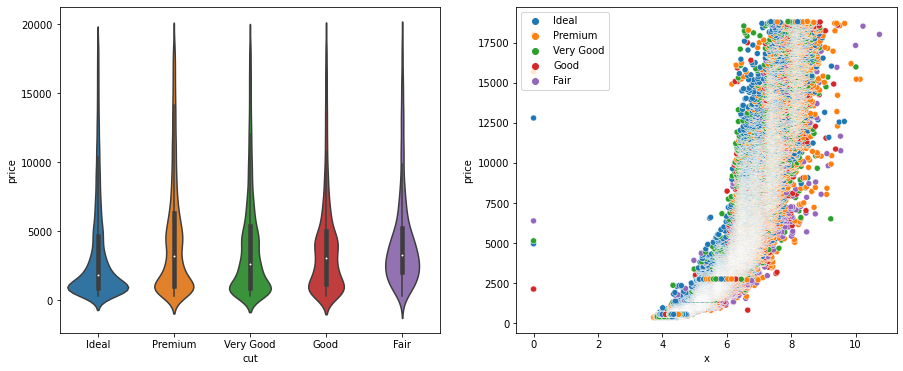

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=((15,6)))
plt.subplot(1,2,1)
sns.violinplot(x='cut',y='price',data=diamond)
plt.subplot(1,2,2)
sns.scatterplot(x='x',y='price',hue='cut',data=diamond)
plt.legend(loc='upper left')
plt.show()

In [6]:
#question 11
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [8]:
diamond.loc[:,["carat","depth","x","y","z","price"]]

,carat,depth,x,y,z,price
0,0.23,61.5,3.95,3.98,2.43,326
1,0.21,59.8,3.89,3.84,2.31,326
2,0.23,56.9,4.05,4.07,2.31,327
3,0.29,62.4,4.20,4.23,2.63,334
4,0.31,63.3,4.34,4.35,2.75,335
...,...,...,...,...,...,...
53935,0.72,60.8,5.75,5.76,3.50,2757
53936,0.72,63.1,5.69,5.75,3.61,2757
53937,0.70,62.8,5.66,5.68,3.56,2757
53938,0.86,61.0,6.15,6.12,3.74,2757


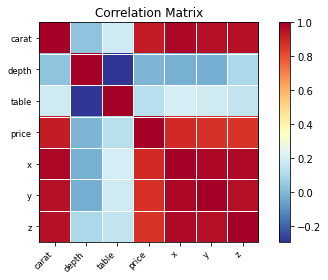

In [10]:
corr = diamond.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [12]:
MX = diamond[['x', 'y', 'carat', 'table', 'z', 'depth']].values.reshape(-1, 6)
MY = diamond['price'].values.flatten()

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)
Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(diamond.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))

The R-Squared:  0.8589542625888943
carat :  -1286.7995742851674
cut :  37.63252068520478
color :  10683.184259659189
clarity :  -104.26736871743186
depth :  53.39486424106863
table :  -204.09955335280472
The intercept of our slope is:  20976.56373603717
Mean Absolute Error: 888.4808633900913
Mean Squared Error: 2242178.904085596
Root Mean Squared Error: 1497.3906985438357


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#print(sns.get_dataset_names())
#tips = sns.load_dataset("tips")
#cars = sns.load_dataset("car_crashes")
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
data=pd.DataFrame(titanic.copy())
titanic.dropna(axis=0,inplace=True)
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [18]:
titanic.shape

(182, 15)

In [19]:
data.loc[(data['survived'] == 1) & (data['sex'] == 'female')].shape[0]

233

In [20]:
data.loc[(data['survived']==0) & (data['sex']=='male'),['age']].mean()

age    31.618056
dtype: float64

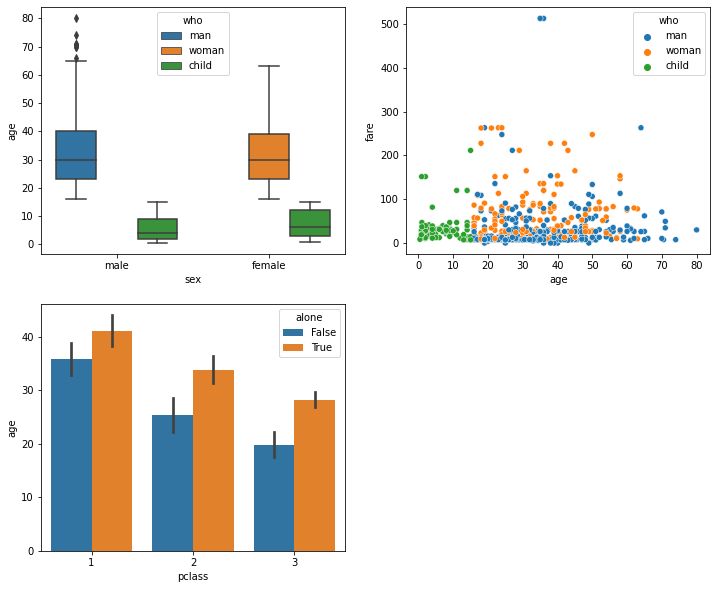

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
sns.boxplot(x="sex", y="age", hue="who", data=data)

plt.subplot(2,2,2)
sns.scatterplot(x="age", y="fare",hue="who", data=data)

plt.subplot(2,2,3)
sns.barplot(x="pclass", y="age", hue="alone", data=data)

plt.show()

In [ ]:
#logistics reggression

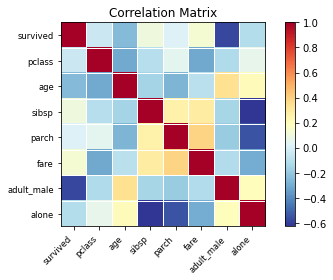

In [23]:
corr = titanic.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [25]:
titanic.loc[:,["pclass","age","parch","fare","survived"]]

,pclass,age,parch,fare,survived
1,1,38.0,0,71.2833,1
3,1,35.0,0,53.1000,1
6,1,54.0,0,51.8625,0
10,3,4.0,1,16.7000,1
11,1,58.0,0,26.5500,1
...,...,...,...,...,...
871,1,47.0,1,52.5542,1
872,1,33.0,0,5.0000,0
879,1,56.0,1,83.1583,1
887,1,19.0,0,30.0000,1


In [40]:
X = titanic[['parch', 'age', 'pclass', 'fare']].values.reshape(-1, 4)
y = titanic['survived'].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(titanic.survived))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
result.sample(10)

,Test,Predicted,0,1
9,1,1,0.19,0.81
26,0,0,0.61,0.39
20,1,1,0.31,0.69
37,1,1,0.22,0.78
39,1,1,0.28,0.72
29,1,1,0.38,0.62
27,1,0,0.53,0.47
0,1,1,0.18,0.82
14,0,1,0.26,0.74
1,0,1,0.40,0.60


In [41]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[ 4 10]
 [ 2 30]]


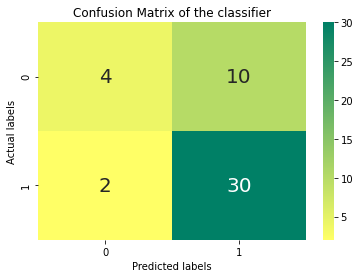

In [44]:
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(titanic.survived),
           yticklabels=np.unique(titanic.survived))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()
1

people_survive=dataset.loc[(dataset['survived']==1)&(dataset[['age'],['sex']])]
1

people_survive=dataset.loc[(dataset['survived']==1)&(dataset[['age'],['sex']])]

In [ ]:
#differential equations
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt

In [ ]:
#Mat generator
def MatGenerator(a,b,K,alpha,beta,N,g):
    h=(b-a)/N
    global x
    x=np.linspace(a,b,N+1)
    b=np.zeros(N+1)
    b[0]=alpha
    b[N]=beta
    b[1:N]=(h**2/K)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-1
    A[N-1,N]=-1
    A[1:N,1:N]=2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)-np.eye(N-1,N-1,k=-1)
    return A,b